In [ ]:
# libraries installation
install.packages("devtools")
install_github("trinker/qdapDictionaries")
install_github("trinker/qdapRegex")
install_github("trinker/qdapTools")
install_github("trinker/qdap")

install.packages("rJava")
install.packages("qdap")
install.packages("tidytext")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("stopwords")

In [1]:
# libraries activation
library(devtools)
library(rJava)
library(qdap)
library(ggplot2)
library(tidytext)
library(dplyr)
library(wordcloud)
library(stopwords)

Loading required package: usethis

Loading required package: qdapDictionaries

Loading required package: qdapRegex

Loading required package: qdapTools

Loading required package: RColorBrewer


Attaching package: 'qdap'


The following objects are masked from 'package:base':

    Filter, proportions



Attaching package: 'ggplot2'


The following object is masked from 'package:qdapRegex':

    %+%



Attaching package: 'dplyr'


The following object is masked from 'package:qdapTools':

    id


The following object is masked from 'package:qdapRegex':

    explain


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
# setting options
# graphics size (in Jupyter Notebook)
options(repr.plot.width=16, repr.plot.height=9)

In [3]:
# Multiple plot function
# from http://www.cookbook-r.com/Graphs/Multiple_graphs_on_one_page_(ggplot2)/
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

# Importing data

In [4]:
# importing the csv file containing the data
# the file was imported from the Kaggle repository : https://www.kaggle.com/datasets/khalidryder777/500k-chatgpt-tweets-jan-mar-2023
tweetsFile <- read.csv("Twitter Jan Mar.csv", header=TRUE)

# Understanding the dataset

In [5]:
# checking the first ten rows of the dataframe
head(tweetsFile)

,date,id,content,username,like_count,retweet_count
,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,2023-03-29 22:58:21+00:00,1641213230730051584,"Free AI marketing and automation tools, strategies, and collaboration launching new week https://t.co/Qwti8LfBpb #ChatGPT",RealProfitPros,0,0
2,2023-03-29 22:58:18+00:00,1641213218520481805,@MecoleHardman4 Chat GPT says it<80><99>s 15. <9f><98><82>,AmyLouWho321,0,0
3,2023-03-29 22:57:53+00:00,1641213115684536323,"https://t.co/FjJSprt0te - Chat with any PDF! Check out how this new AI quickly answers questions from your PDFs. Perfect for students, researchers, and other curious minds. #research #chatpdf #ChatGPT",yjleon1976,0,0
4,2023-03-29 22:57:52+00:00,1641213110915571715,"AI muses: ""In the court of life, we must all face the judge of destiny and the jury of our actions. <9a><96><8f><9f><94> #OutOfContextAI #AILifeLessons #ChatGPT",ChatGPT_Thinks,0,0
5,2023-03-29 22:57:26+00:00,1641213003260633088,"Most people haven't heard of Chat GPT yet. First, elite factions will decide which way to go on AI safety. Next they will push their agenda(s) on the public with misleading and oversimplified media presentations. Finally, the brainless Red and Blue camps will screech their lines",nikocosmonaut,0,0
6,2023-03-29 22:57:20+00:00,1641212975012016128,@nytimes No! Chat Gpt has been putting together amazing recipes <9f><98><9f><98><9f><98>,cordydbarb,0,0


In [6]:
# shape of dataframe
dim(tweetsFile)

[1] 500036      6

In [7]:
# basic dataframe information
str(tweetsFile)

'data.frame':	500036 obs. of  6 variables:
 $ date         : chr  "2023-03-29 22:58:21+00:00" "2023-03-29 22:58:18+00:00" "2023-03-29 22:57:53+00:00" "2023-03-29 22:57:52+00:00" ...
 $ id           : chr  "1641213230730051584" "1641213218520481805" "1641213115684536323" "1641213110915571715" ...
 $ content      : chr  "Free AI marketing and automation tools, strategies, and collaboration launching new week https://t.co/Qwti8LfBpb   #ChatGPT" "@MecoleHardman4 Chat GPT says it\342\200\231s 15. \360\237\230\202" "https://t.co/FjJSprt0te - Chat with any PDF!\nCheck out how this new AI quickly answers questions from your PDF"| __truncated__ "AI muses: \"In the court of life, we must all face the judge of destiny and the jury of our actions. \342\232\2"| __truncated__ ...
 $ username     : chr  "RealProfitPros" "AmyLouWho321" "yjleon1976" "ChatGPT_Thinks" ...
 $ like_count   : int  0 0 0 0 0 0 1 0 0 2 ...
 $ retweet_count: int  0 0 0 0 0 0 0 0 0 0 ...


In [8]:
# Basic statistics on likes
# some tweets got up to 64094 likes!
summary(tweetsFile$like_count)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
    0.00     0.00     1.00     7.12     2.00 64094.00       62 

In [9]:
# Basic statistics on retweets
# most got 0 retweets
summary(tweetsFile$retweet_count)


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
    0.000     0.000     0.000     1.482     0.000 16080.000        62 

In [10]:
# the top 10 tweets in terms of likes
top_n(tweetsFile, 10, like_count) %>% arrange(desc(like_count))
    

date,id,content,username,like_count,retweet_count
<chr>,<chr>,<chr>,<chr>,<int>,<int>
2023-02-03 23:09:47+00:00,1621647164123365377,Writing erotic prompts for Chat GPT hoping to be the first person to make AI cum. It<80><99>s like the Turing Test,MoistCr1TiKaL,64094,2624
2023-01-13 04:30:44+00:00,1613755402608381952,Best AI Tools You Need To Know #chatgpt #chatgpt3 #ArtificialIntelligence #ai https://t.co/0jfr8cOMoo,johnvianny,63835,16080
2023-03-06 00:28:40+00:00,1632538650897534980,"I am pretty sure I am reading my first CHAT GPT student essay and like, teachers, don't panic. You'll know it when you see it.",rgay,44940,1349
2023-01-07 04:31:47+00:00,1611581338351730688,ultra-modern generative ai<9f><97><8f>: <80> AI2 <80> AI21 <80> mdm <80> gpt-J <80> gpt-3 <80> x-clip <80> bloom <80> cohere <80> gopher <80> dall<80>e 2 <80> craiyon <80> tabnine <80> jukebox <80> chatGPT *** <80> anthropic <80> codegeex <80> nvidia get3d <80> dreamfusion <80> stable diffusion <80> meta make-a-video https://t.co/ON5eIGvnEQ,aaronsiim,42125,11501
2023-01-12 08:04:15+00:00,1613446745328963584,First #ChatGPT answer which made me pause. https://t.co/nbc9uRoWlA,kevinschawinski,38278,4160
2023-01-18 13:49:14+00:00,1615707890903293952,AI copywriting tools to check out: 1. Chat GPT - Research 2. QuillBot - Paraphrasing 3. StoryLab - Hooks and outlines 4. Grammarly - Grammar/spelling 5. Hemingway - Conciseness/clarity 6. Power Thesaurus - Thesaurus 7. Tweet Hunter - Content creation What else?,writingtoriches,37048,10498
2023-03-29 11:23:49+00:00,1641038447023366144,Chat GPT reveals <80><9c>The Best 11 Of All Time<80><9d> https://t.co/NJp7KJfjp3,ProudFede,28049,1686
2023-03-14 17:02:28+00:00,1635687853324902401,"here is GPT-4, our most capable and aligned model yet. it is available today in our API (with a waitlist) and in ChatGPT+. https://t.co/2ZFC36xqAJ it is still flawed, still limited, and it still seems more impressive on first use than it does after you spend more time with it.",sama,22310,4592
2023-01-10 20:44:23+00:00,1612913266195587072,"This is a frightening visual for me. The first dot is the amount of data Chat GPT 3 was trained on. The second is what chat GPT 4 is trained on. They are already doing demos. It can write a 60,000 word book from a single prompt. The only question I've had about AI<80> https://t.co/DnAEMm60lh",AlexHormozi,21476,3777


In [11]:
# the top 10 tweets in terms of retweet
top_n(tweetsFile, 10, retweet_count) %>% arrange(desc(retweet_count))
    

date,id,content,username,like_count,retweet_count
<chr>,<chr>,<chr>,<chr>,<int>,<int>
2023-01-13 04:30:44+00:00,1613755402608381952,Best AI Tools You Need To Know #chatgpt #chatgpt3 #ArtificialIntelligence #ai https://t.co/0jfr8cOMoo,johnvianny,63835,16080
2023-01-07 04:31:47+00:00,1611581338351730688,ultra-modern generative ai<9f><97><8f>: <80> AI2 <80> AI21 <80> mdm <80> gpt-J <80> gpt-3 <80> x-clip <80> bloom <80> cohere <80> gopher <80> dall<80>e 2 <80> craiyon <80> tabnine <80> jukebox <80> chatGPT *** <80> anthropic <80> codegeex <80> nvidia get3d <80> dreamfusion <80> stable diffusion <80> meta make-a-video https://t.co/ON5eIGvnEQ,aaronsiim,42125,11501
2023-01-18 13:49:14+00:00,1615707890903293952,AI copywriting tools to check out: 1. Chat GPT - Research 2. QuillBot - Paraphrasing 3. StoryLab - Hooks and outlines 4. Grammarly - Grammar/spelling 5. Hemingway - Conciseness/clarity 6. Power Thesaurus - Thesaurus 7. Tweet Hunter - Content creation What else?,writingtoriches,37048,10498
2023-01-09 04:35:00+00:00,1612306922681630721,"Creators and writers are making $1,000,000s using ChatGPT. But 99% of people don't know how to build a Business and make money using it. I just built ChatGPT Business Crash Course. Free for the next 24 hours! Like, RT &amp; comment ""GPT"" and I'll DM it to you (Must be following) https://t.co/L3qVoUudOk",garryflix,13393,8096
2023-03-25 04:31:39+00:00,1639485169911627777,$150 || 7250 PHP || 2.1 IDR $100 <9c><85> RT &amp; Follow @gptaiinu +$50 <9c><85> Join Telegram (post proof) https://t.co/sUAaxEo8D0 ends in 48 hours ------------ First ChatGPT lead Crypto Project. <9f><96><9f><9a><80> DEX- https://t.co/CzcEyt8xy8 #ChatGPT https://t.co/rH00LZM3oK,crypto_bearr,1833,8060
2023-02-24 13:49:22+00:00,1629116276286029824,$250 <80><94> 48 Hours <80><94> <9e><96> RT &amp; Follow: @DegenAI2 <9e><96>Join Telegram: https://t.co/WyPzGgbdBE <9e><96> Generate an image using our telegram bot and post in on a tweet with the tags (TAGS) @DegenAI2 #altcoins #altcoin #DegenAI #Gems #imgnAI #crypto $CAI #CryptoAI #ChatGPT #cryptocurrency https://t.co/c9FkcznAMH,TheRavenCrypto,1705,5429
2023-01-30 12:23:45+00:00,1620035035641581568,Ispolink has been incorporating #AI long before #ChatGPT become extremely popular <9f><92> <9f><93><98>Learn how $ISP disrupts the workforce space by utilizing #AI to offer game-changing products <9f><91><87> https://t.co/I6OTNnKw0b,ispolink,2333,4835
2023-03-14 17:02:28+00:00,1635687853324902401,"here is GPT-4, our most capable and aligned model yet. it is available today in our API (with a waitlist) and in ChatGPT+. https://t.co/2ZFC36xqAJ it is still flawed, still limited, and it still seems more impressive on first use than it does after you spend more time with it.",sama,22310,4592
2023-02-21 13:37:05+00:00,1628026023122968578,$200 <80> 48 Hours <9f><91><91> <96><8f> RT &amp; Follow: @DegenAI2 <96><8f>Join Telegram: https://t.co/uURcvjbLS6 <96><8f> Generate an image using our telegram bot and post in on a tweet with the tags (TAGS) @DegenAI2 #DegenAI $imgnAI $IMGNAI #ai #aibot #crypto $CAI #CryptoAI $EVOAI #ChatGPT Post Proof https://t.co/UnXVBuqkiu,ChiniGives,1430,4468


# Data pre-processing

In [12]:
# let's create a tweets variable, with the tweets' content
tweets_unaltered <- tweetsFile$content

In [13]:
# checking the first ten tweets, to see how data look like
tweets_unaltered[1:10]

[1] "Free AI marketing and automation tools, strategies, and collaboration launching new week https://t.co/Qwti8LfBpb   #ChatGPT"                                                                                                                                                                                     
 [2] "@MecoleHardman4 Chat GPT says it\342\200\231s 15. \360\237\230\202"                                                                                                                                                                                                                                              
 [3] "https://t.co/FjJSprt0te - Chat with any PDF!\nCheck out how this new AI quickly answers questions from your PDFs.\nPerfect for students, researchers, and other curious minds. \n#research #chatpdf #ChatGPT"                                                                                                    
 [4] "AI muses: \"In the court of life, we must all face the judge of destiny and the jury of our actions. \342\232\226\357\270\217\360\237\224\256 #OutOfContextAI #AILifeLessons #ChatGPT"                                                                                                                           
 [5] "Most people haven't heard of Chat GPT yet.\nFirst, elite factions will decide which way to go on AI safety. Next they will push their agenda(s) on the public with misleading and oversimplified media presentations. Finally, the brainless Red and Blue camps will screech their lines"                        
 [6] "@nytimes No! Chat Gpt has been putting together amazing recipes \360\237\230\253\360\237\230\253\360\237\230\253"                                                                                                                                                                                                
 [7] "@ylzkrtt Yes also by chat gpt you can make generative art more easy but needs code KNOWLEDGE. I did post resently some article about this matter. Take a look."                                                                                                                                                  
 [8] "@robinhanson @razibkhan Most people haven't heard of Chat GPT yet.\nFirst, elite factions will decide which way to go on AI safety. Next they will push their agenda(s) on the public with misleading and oversimplified media presentations. Finally, the brainless Red and Blue camps will screech their lines"
 [9] "Yours Robotically - by Shaun Usher - Letters of Note | I think #ChatGPT has been reading too many steamy romance novels \360\237\230\202 https://t.co/r8WTOs1hYZ"                                                                                                                                                
[10] "This is a metaphor for the limited perception of reality that many people experience and is used in #TheMatrix to add depth and complexity to the film's themes #BCM325 #ChatGPT \nhttps://t.co/2S2Dy7Fqd0"

In [14]:
# checking if there are missing data
# no tweets with NAs, no need to deal with them!
table(is.na(tweets_unaltered))



 FALSE 
500036 

In [15]:
# are there any duplicates in the dataframe?
# nope!
nrow(distinct(tweetsFile)) != nrow(tweetsFile)

[1] FALSE

# Data processing

In [16]:
# initialize the seed, so to replicate sampled data
set.seed(12345)

In [17]:
# 500k tweets take a lot of time to process
# you may want to sample nbTweets=50000 tweets for the preliminary analyses
# nbTweets <- 50000
# tweets_df <- tweetsFile[sample(1:nrow(tweetsFile), nbTweets),]
tweets_df <- tweetsFile
tweets <- tweets_df$content
tweets[10:20]

[1] "This is a metaphor for the limited perception of reality that many people experience and is used in #TheMatrix to add depth and complexity to the film's themes #BCM325 #ChatGPT \nhttps://t.co/2S2Dy7Fqd0"                                                                                                  
 [2] "Anyone familiar with The \"cave allegory\"? In this allegory, Plato describes a group of people who are chained inside a cave and can only see the shadows cast on the wall in front of them. #BCM325 #ChatGPT"                                                                                              
 [3] "@ThatOuternaut HEY CHAT GPT I DON'T GOT TIME FOR THIS BOZO!!! CAN YOU THINK OF SOMETHING\n\n\"Certainly! Thinking.....\n\nI was able to locate this user's medical records and discovered he recently saw his doctor about his 'small peepee disorder'. Maybe try that?\"\n\nOHHHHH SHIT!!!! OHHHHH BTFO!!!!"
 [4] "#GenerativeAI  such as #ChatGPT could replace 300 MILLION #workers \342\200\223 #GoldmanSachs.\n\n2/3 of #Westerm #Jobs are vulnerable to some degree of #ArtificialIntelligence #AI #automation.\nhttps://t.co/PxqGBEoX7T"                                                                                  
 [5] "@rasbt Reading it right now love the fact that you put references to articles. And walking though the code section with chat gpt made it so much easier. Thank you for your awesome work!"                                                                                                                   
 [6] "The oracle is a program created by the machines, she has the ability to predict the future - she is instrumental in helping Neo to understand his destiny as the one (the prophesied individual who can defeat the Matrix and liberate humanity)  #bcm325 #chatGPT https://t.co/RsuYDkS32s"                  
 [7] "You know what a good feature be in ChatGPT @OpenAI? Sharing a link to a conversation, making it public.\n\nUse-case is having a conversation with ChatGPT and wanting to share the result with a teammate without having to worry about formatting while copying &amp; pasting. #AI #ChatGPT"                
 [8] "#BCM325 I asked #ChatGPT how The Matrix (1999) uses operational research. In short, the machines use algorithms, data analysis, and other techniques to control the simulated reality, with the use of AI agents consistently monitoring to keep society in check. 1/3"                                      
 [9] "Though it primarily targets companies like Tik-Tok, the bill's language is much too broad, according to the crypto advocacy group. #BTC #Bitcoin #CryptoNews #cryptomarket #ChatGPT #openai Sentiment Result : Negative @crypto_talkies https://t.co/C756R9j244"                                             
[10] "By harnessing the power of technology, we can tell richer, more compelling stories that reflect the full range of human experiences. #AI  #MachineLearning #ChatGPT"                                                                                                                                         
[11] "The future is in the integrations. It won't be long before #ChatGPT will be hosted in a primate's #neuralink chip."

In [18]:
# set everything to lowercase
tweets <- tolower(tweets)

# Remove mentions, urls, emojis, numbers, punctuations, etc.
tweets <- gsub("@\\w+", "", tweets)
tweets <- gsub("https?://.+", "", tweets)
tweets <- gsub("\\d+\\w*\\d*", "", tweets)
tweets <- gsub("#\\w+", "", tweets)
tweets <- gsub("[^\x01-\x7F]", "", tweets)
tweets <- gsub("[[:punct:]]", " ", tweets)

# let's remove spaces and newlines
tweets <- gsub("\n", " ", tweets)
tweets <- gsub("^\\s+", "", tweets)
tweets <- gsub("\\s+$", "", tweets)
tweets <- gsub("[ |\t]+", " ", tweets)

## Analysing polarity


In [19]:
# analysing polarity on all tweets
tweets_polarity_df <- polarity(tweets)

# keeping only the main results in a new variable
polarity_all <- tweets_polarity_df$all

In [20]:
# checking the polarity results - first 10 rows
polarity_all %>%
    filter(row_number() <= 10)

all,wc,polarity,pos.words,neg.words,text.var
<chr>,<int>,<dbl>,<list>,<list>,<chr>
all,12,0.2886751,free,-,free ai marketing and automation tools strategies and collaboration launching new week
all,4,0.0000000,-,-,chat gpt says its
all,0,NaN,-,-,
all,21,0.2182179,destiny,-,ai muses in the court of life we must all face the judge of destiny and the jury of our actions
all,48,-0.4330127,elite,"misleading , oversimplified, brainless , screech",most people haven t heard of chat gpt yet first elite factions will decide which way to go on ai safety next they will push their agenda s on the public with misleading and oversimplified media presentations finally the brainless red and blue camps will screech their lines
all,9,0.3333333,amazing,-,no chat gpt has been putting together amazing recipes
all,28,0.3401680,easy,-,yes also by chat gpt you can make generative art more easy but needs code knowledge i did post resently some article about this matter take a look
all,48,-0.4330127,elite,"misleading , oversimplified, brainless , screech",most people haven t heard of chat gpt yet first elite factions will decide which way to go on ai safety next they will push their agenda s on the public with misleading and oversimplified media presentations finally the brainless red and blue camps will screech their lines
all,18,0.0000000,-,-,yours robotically by shaun usher letters of note i think has been reading too many steamy romance novels


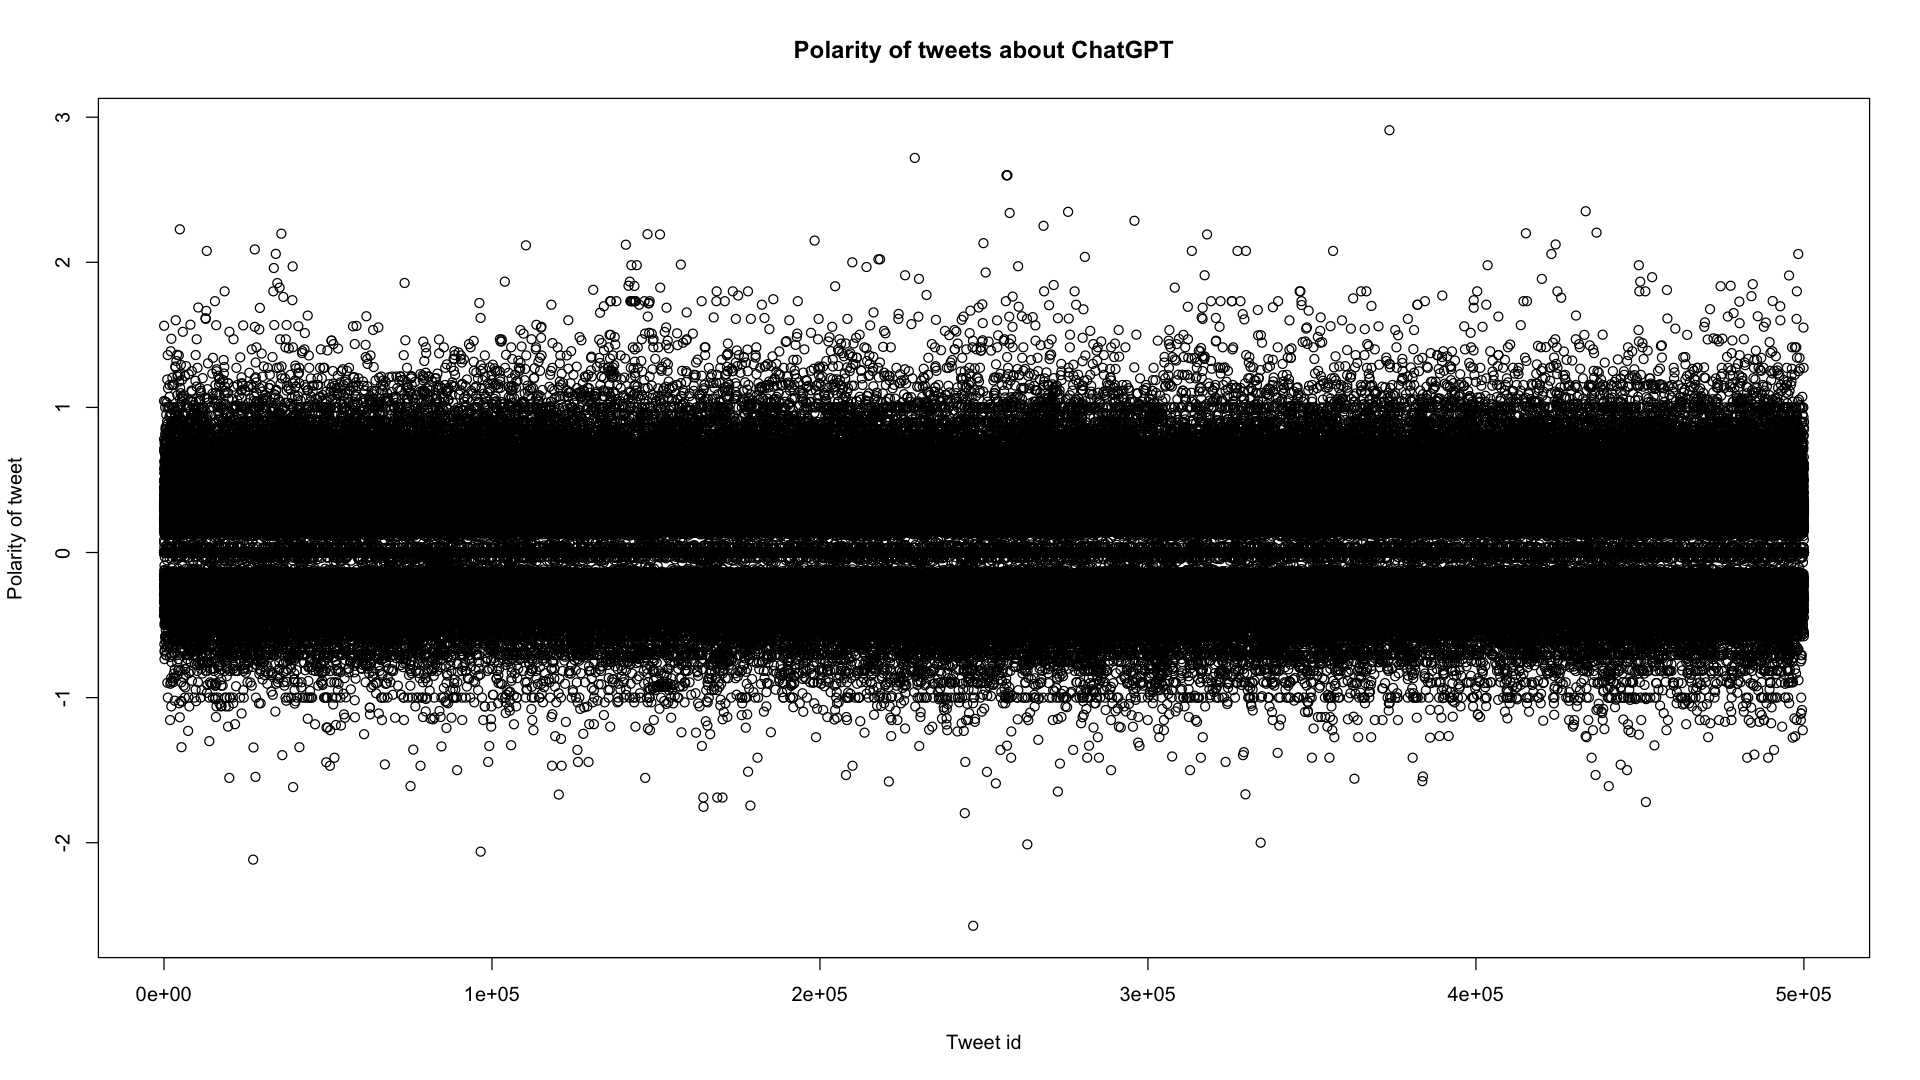

In [21]:
# plotting polarity
# there seems to be a little more tweets that score a polarity above 0 than below
plot(polarity_all$polarity, main="Polarity of tweets about ChatGPT", xlab="Tweet id", ylab="Polarity of tweet")

Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
i Please use `after_stat(density)` instead."


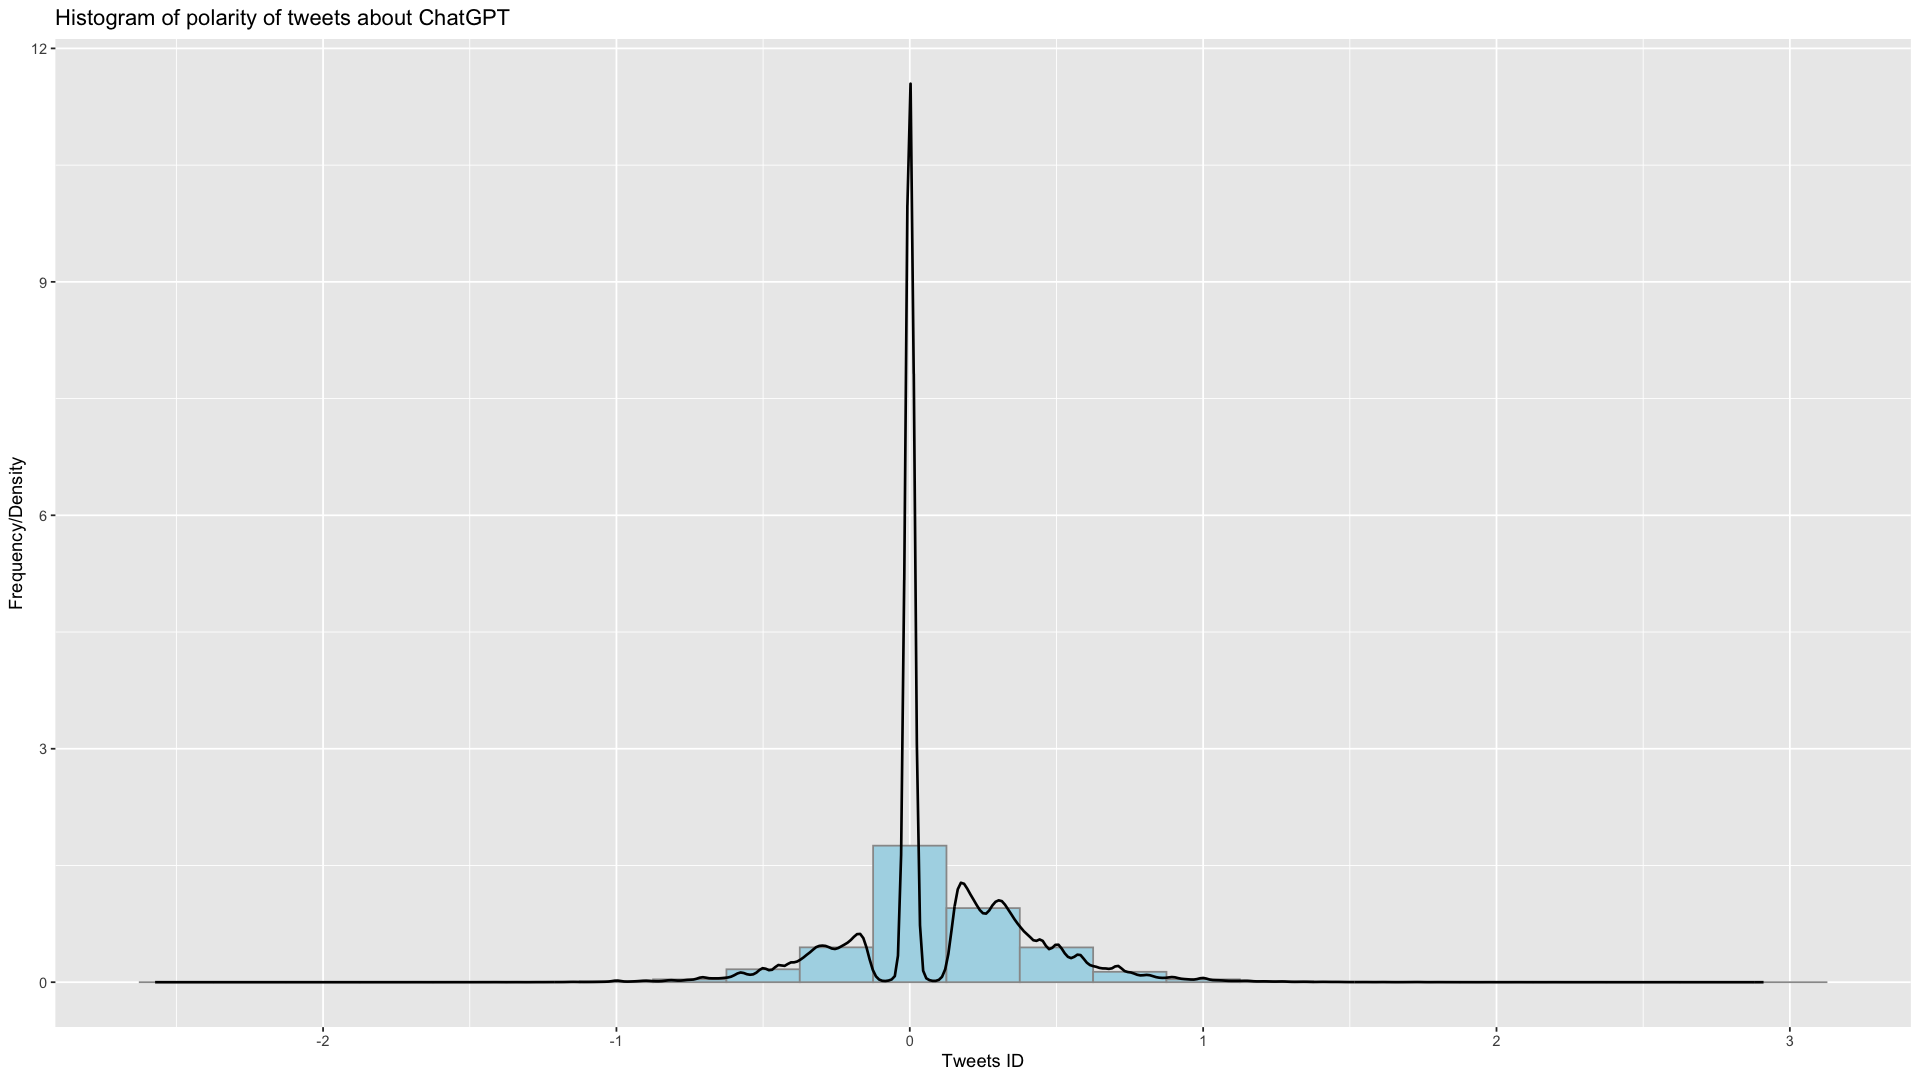

In [22]:
# Histogram and density plots of polarity of tweets
# it seems here that a lot of tweets have a polarity of zero
# otherwise there are a bit more positive tweets than negative
ggplot(polarity_all[!is.na(polarity_all$polarity),], aes(x = polarity, y = ..density..)) + 
  geom_histogram(binwidth = 0.25, fill = "lightblue", colour = "grey60") +
  geom_density(linewidth = 0.75) +
  labs(title = "Histogram of polarity of tweets about ChatGPT", x="Tweets ID", y="Frequency/Density")

In [23]:
# let's create a sentiment label variable, according if polarity is above, equal to, or less than 0
polarity_all$sentiment <- ifelse(polarity_all$polarity == 0, "Neutral" , ifelse(polarity_all$polarity > 0, "Positive", "Negative" ))
table(polarity_all$sentiment)


Negative  Neutral Positive 
   84490   213578   199147 

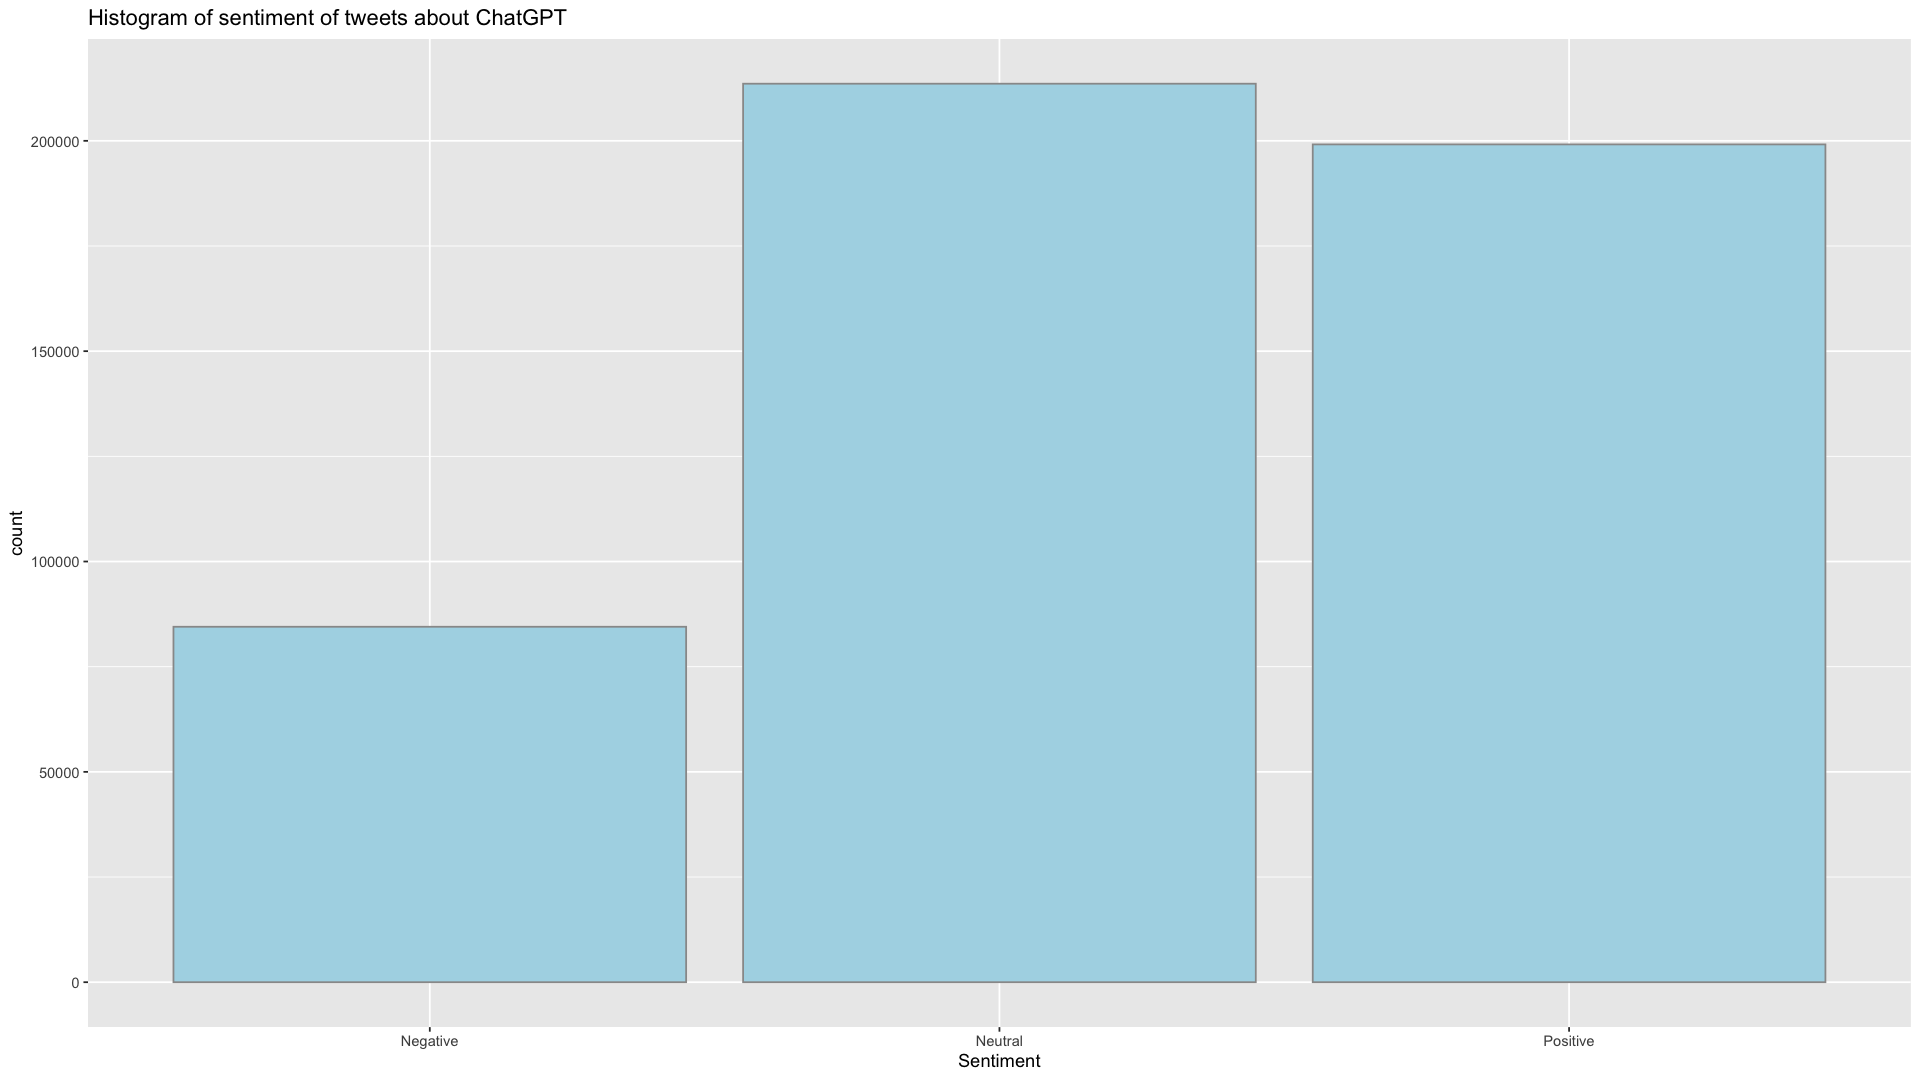

In [24]:
ggplot(subset(polarity_all, !is.na(sentiment)), aes(sentiment)) + 
  geom_bar(fill = "lightblue", colour = "grey60") +
  labs(title = "Histogram of sentiment of tweets about ChatGPT", x="Sentiment")
  

## Analysing words

In [25]:
# extracting the positive words from the polarity analysis
pos.words <- polarity_all$pos.words
pos.words[1:10]

[[1]]
[1] "free"

[[2]]
[1] "-"

[[3]]
[1] "-"

[[4]]
[1] "destiny"

[[5]]
[1] "elite"

[[6]]
[1] "amazing"

[[7]]
[1] "easy"

[[8]]
[1] "elite"

[[9]]
[1] "-"

[[10]]
[1] "-"

In [26]:
# extracting the negative words from the polarity analysis
neg.words <- polarity_all$neg.words
neg.words[1:10]

[[1]]
[1] "-"

[[2]]
[1] "-"

[[3]]
[1] "-"

[[4]]
[1] "-"

[[5]]
[1] "misleading"     "oversimplified" "brainless"      "screech"       

[[6]]
[1] "-"

[[7]]
[1] "-"

[[8]]
[1] "misleading"     "oversimplified" "brainless"      "screech"       

[[9]]
[1] "-"

[[10]]
[1] "limited"

In [30]:
# extracting the most frequent positive words
polarity_all %>%
    filter(pos.words != "-") %>%
    count(pos.words) %>% 
    arrange(desc(n)) %>% 
    top_n(20)

Selecting by n


pos.words,n
<list>,<int>
like,13825
good,4502
better,4367
intelligence,4354
work,3998
free,3860
best,3512
great,3255
right,3155


In [32]:
# extracting the most frequent negative words
polarity_all %>%
    filter(neg.words != "-") %>%
    count(neg.words) %>%
    arrange(desc(n)) %>%
    top_n(20)

Selecting by n


neg.words,n
<list>,<int>
wrong,2031
bad,1603
rival,1538
miss,1469
problem,1414
hype,1298
crazy,1199
hard,1146
threat,973


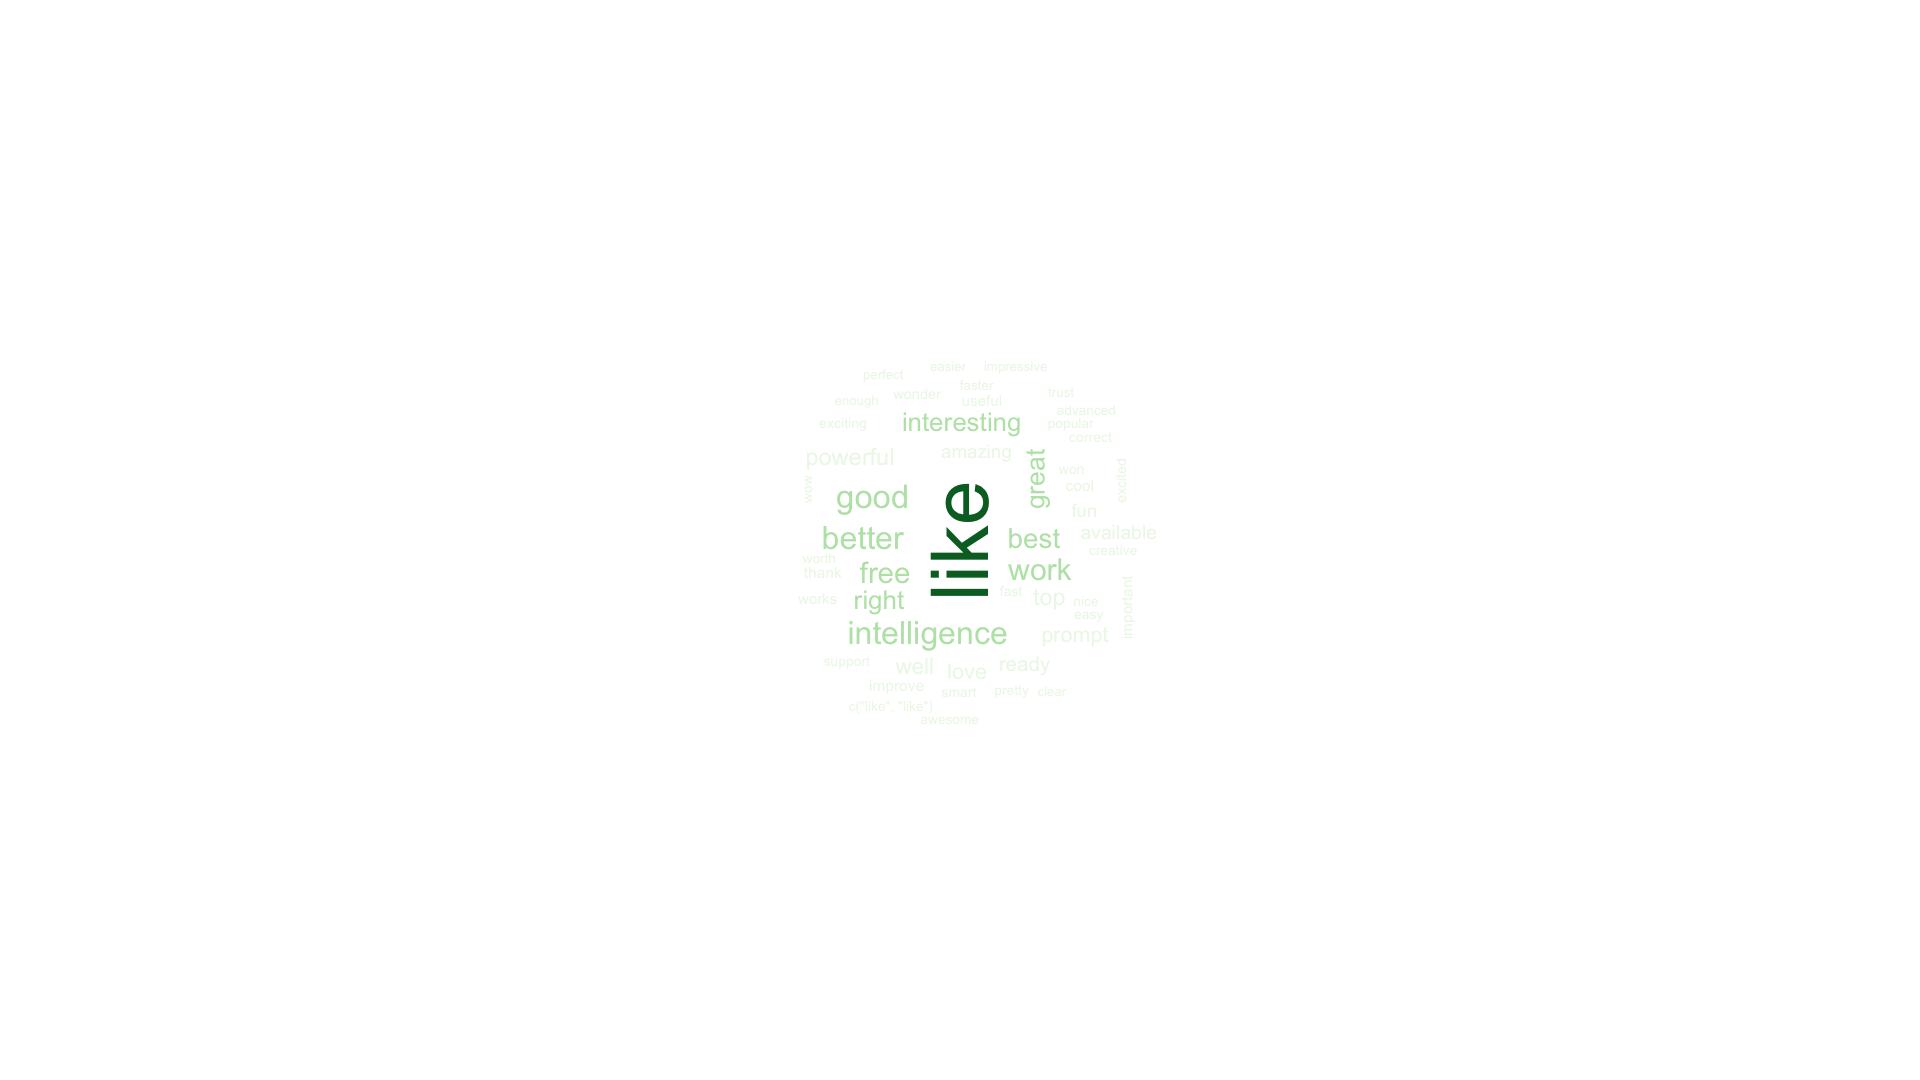

In [40]:
# wordcloud of most frequent positive words
polarity_all %>% 
    filter(pos.words != "-") %>%
    count(pos.words) %>%
    with(wordcloud(pos.words, n, max.words=50, random.order=FALSE, colors=brewer.pal(5,"Greens")))

In [43]:
# extracting the most frequent negative words
polarity_all %>%
    filter(neg.words != "-") %>%
    count(neg.words) %>%
    arrange(desc(n)) %>%
    top_n(20)

Selecting by n


neg.words,n
<list>,<int>
wrong,2031
bad,1603
rival,1538
miss,1469
problem,1414
hype,1298
crazy,1199
hard,1146
threat,973


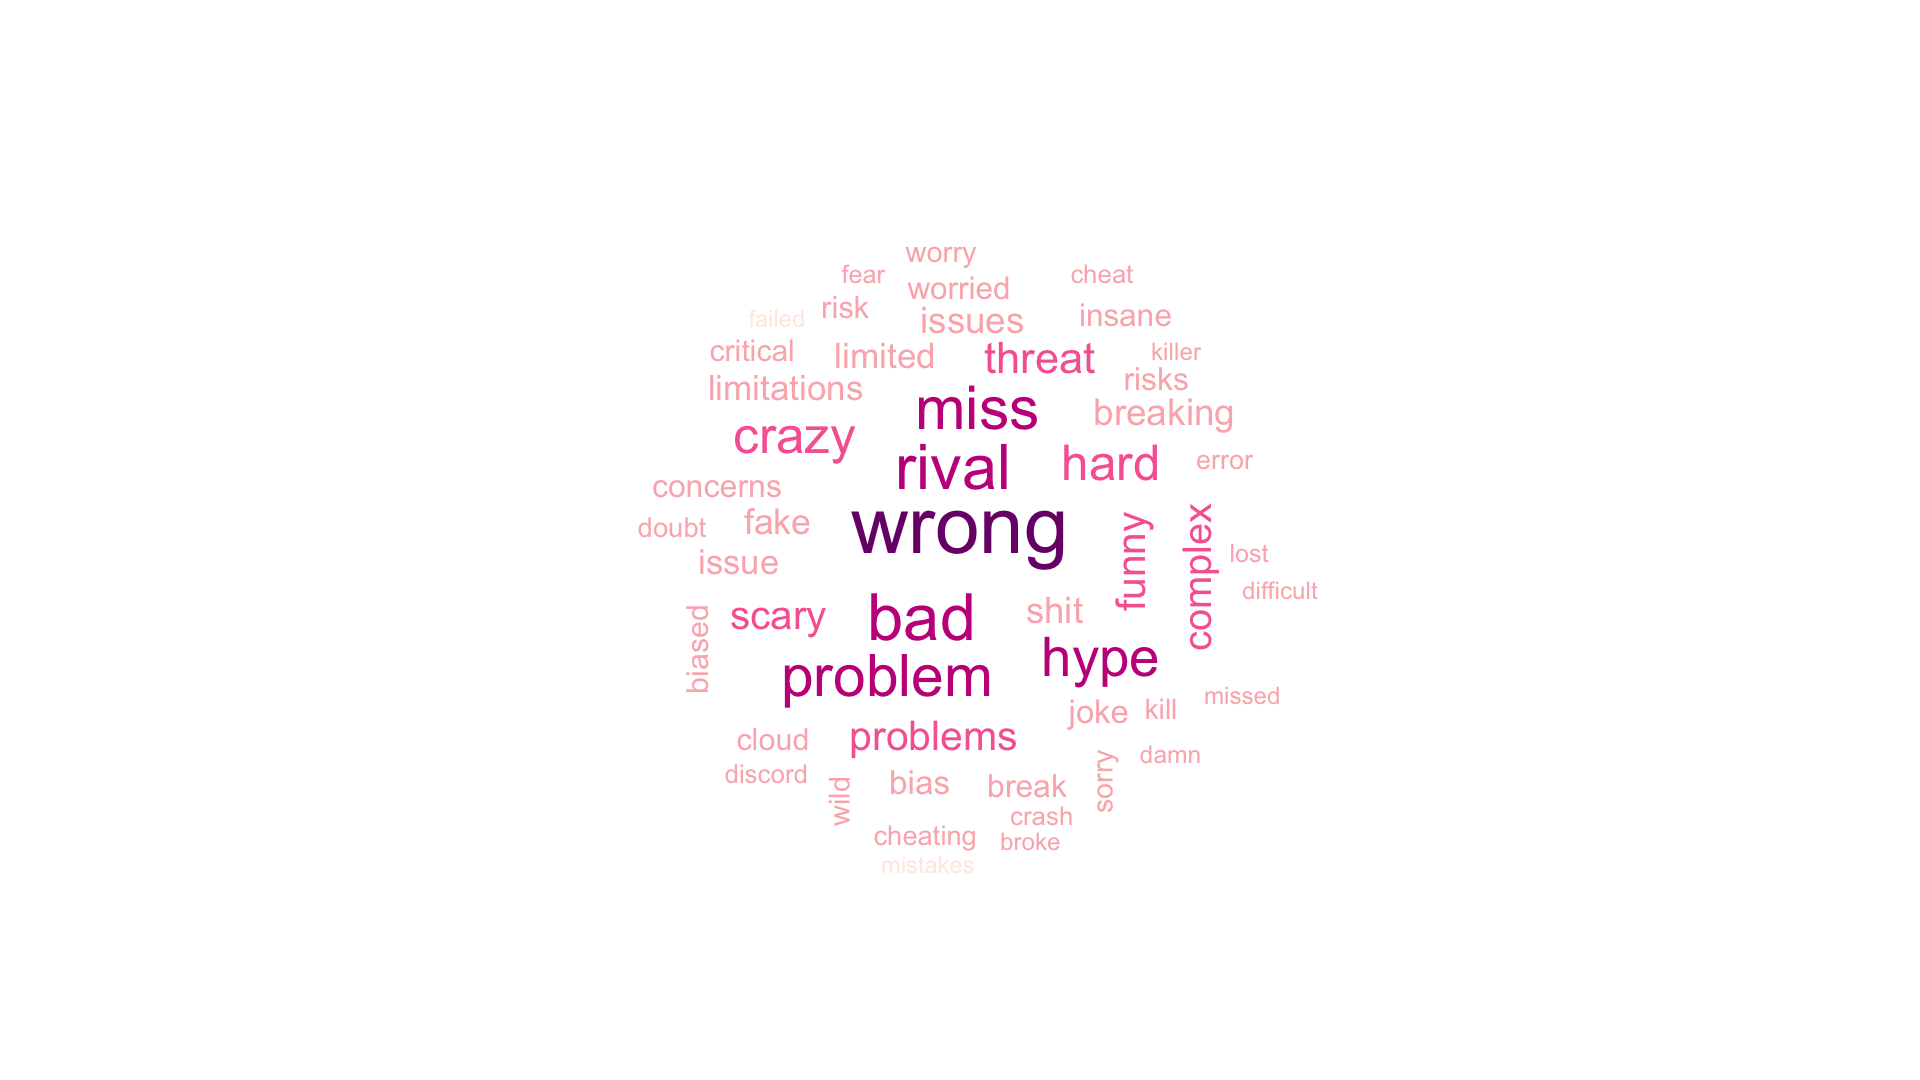

In [44]:
# wordcloud of most frequent negative words
polarity_all %>% 
    filter(neg.words != "-") %>%
    count(neg.words) %>%
    with(wordcloud(neg.words, n, max.words=50, random.order=FALSE, colors=brewer.pal(5,"RdPu")))

## Sentiment analysis with bing lexicon

In [45]:
# getting the bing sentiment lexicon
bing <- get_sentiments("bing")

In [48]:
# showing what bing lexicon looks like - first 10 rows for positive and negative words
bing %>% 
    filter(sentiment == "positive") %>%
    filter(row_number() <=10)
bing %>%
    filter(sentiment == "negative") %>%
    filter(row_number() <=10)

word,sentiment
<chr>,<chr>
abound,positive
abounds,positive
abundance,positive
abundant,positive
accessable,positive
accessible,positive
acclaim,positive
acclaimed,positive
acclamation,positive


word,sentiment
<chr>,<chr>
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative
abomination,negative
abort,negative
aborted,negative


In [54]:
# setiment analysis with bing lexicon
# we'll keep the words only from the tweets dataframe
tweets_words <- polarity_all %>% 
    unnest_tokens(word, text.var) %>%
    select(word)

# checking the resulting dataframe - the first 10 words/rows
tweets_words %>% 
    filter(row_number() <= 10)

word
<chr>
free
ai
marketing
and
automation
tools
strategies
and
collaboration


In [58]:
# sentiment analysis with bing lexicon, on the tweets_words variable
tweets_words_count <- tweets_words %>% 
    inner_join(bing, by = join_by(word), relationship = "many-to-many") %>%
    count(word, sentiment, sort = TRUE)
tweets_words_count %>% 
    top_n(20)

Selecting by n


word,sentiment,n
<chr>,<chr>,<int>
like,positive,37526
good,positive,13052
work,positive,12633
better,positive,11339
intelligence,positive,10044
free,positive,9375
great,positive,9029
best,positive,8557
right,positive,8419


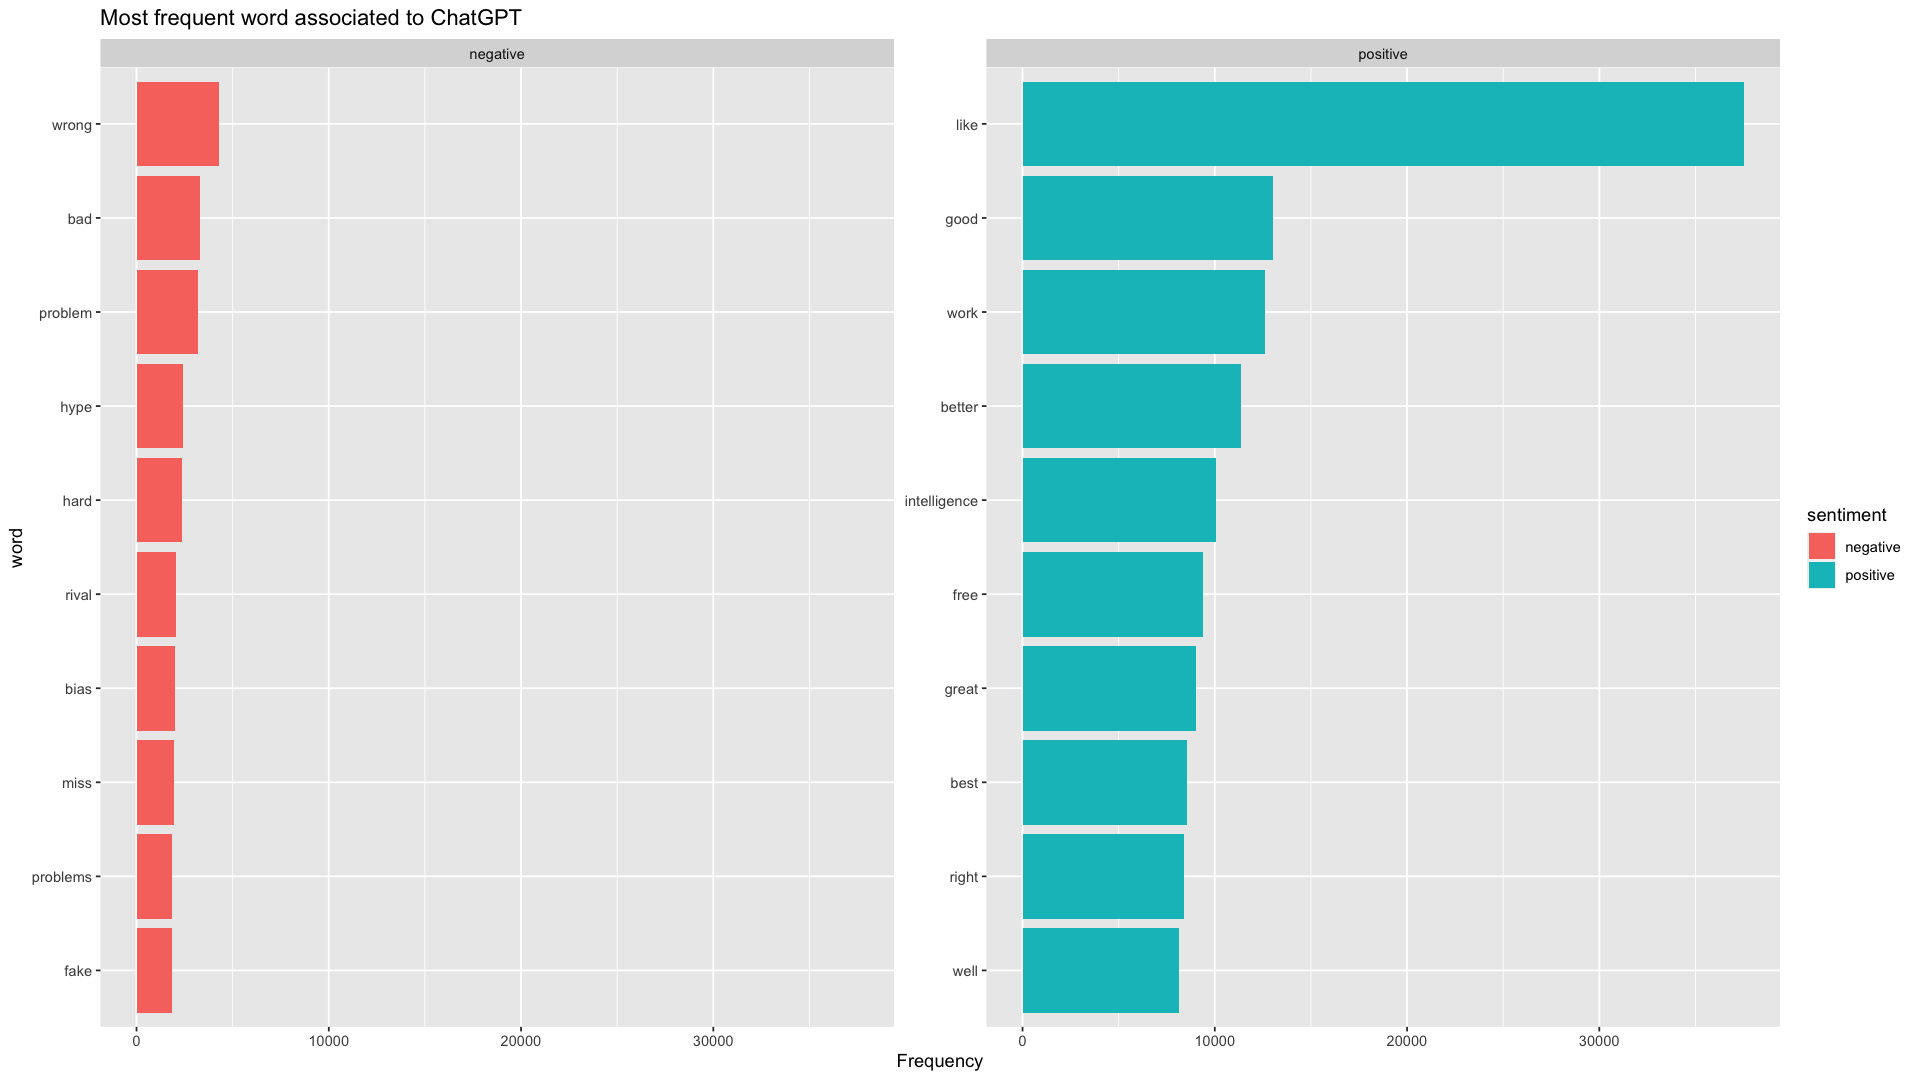

In [59]:
# Showing frequency of negative and positive sentiment of tweets, using bing lexicon
tweets_words_count %>%
    group_by(sentiment) %>%
    slice_max(n, n=10) %>%
    ungroup() %>%
    mutate(word = reorder(word,n)) %>%
    ggplot(aes(n,word, fill=sentiment)) + geom_col(show.legend = TRUE) + facet_wrap(~sentiment, scales="free_y") + labs(title="Most frequent word associated to ChatGPT", x="Frequency")

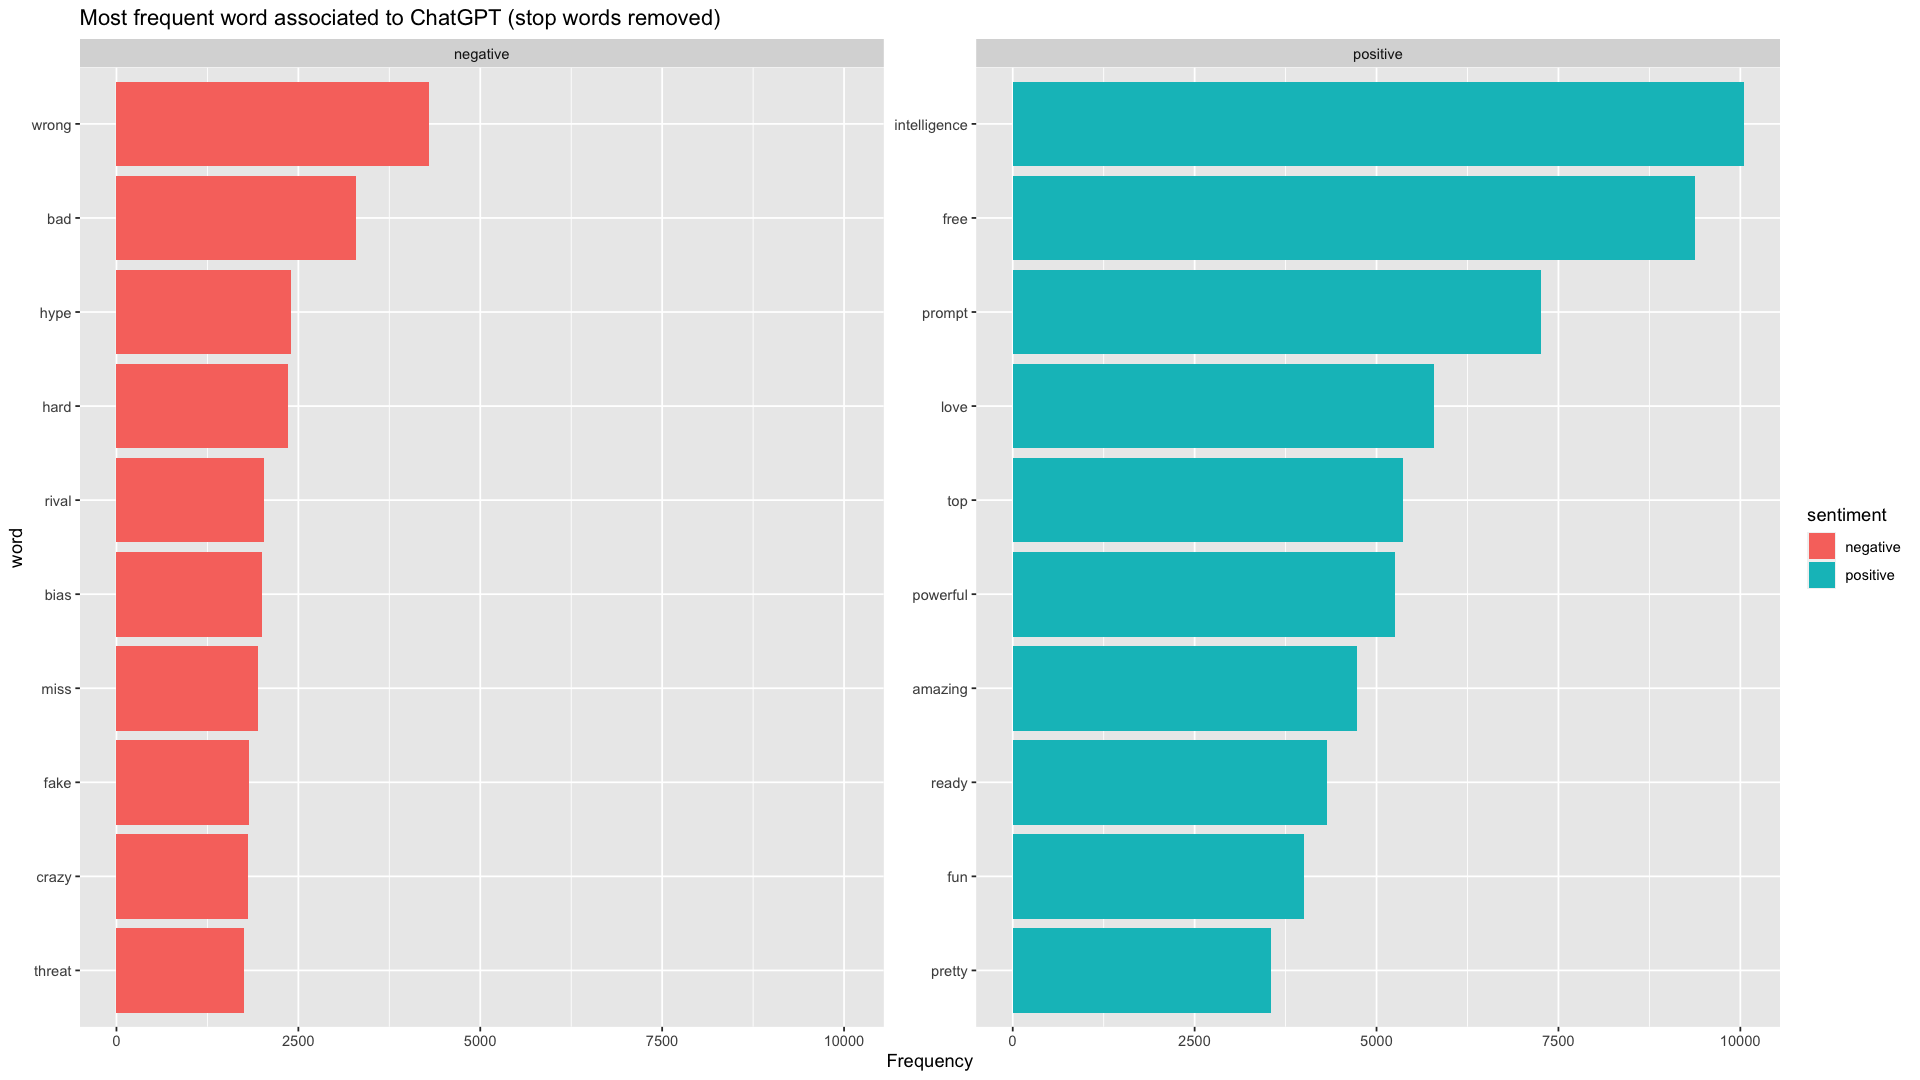

In [60]:
# Showing frequency of negative and positive sentiment of tweets, using bing lexicon
# and removing stop words
tweets_words_count %>%
    anti_join(stop_words, by = join_by(word)) %>%
    group_by(sentiment) %>%
    slice_max(n, n=10) %>%
    ungroup() %>%
    mutate(word = reorder(word,n)) %>%
    ggplot(aes(n,word, fill=sentiment)) + geom_col(show.legend = TRUE) + facet_wrap(~sentiment, scales="free_y") + labs(title="Most frequent word associated to ChatGPT (stop words removed)", x="Frequency")

## Emotion analysis - using Plutchik's wheel of emotions

In [61]:
# using Plutchik's wheel of emotions
# available in nrc lexicon
nrc <- get_sentiments("nrc")
nrc %>% 
    print(n=20)

# A tibble: 13,872 x 2
   word        sentiment
   <chr>       <chr>    
 1 abacus      trust    
 2 abandon     fear     
 3 abandon     negative 
 4 abandon     sadness  
 5 abandoned   anger    
 6 abandoned   fear     
 7 abandoned   negative 
 8 abandoned   sadness  
 9 abandonment anger    
10 abandonment fear     
11 abandonment negative 
12 abandonment sadness  
13 abandonment surprise 
14 abba        positive 
15 abbot       trust    
16 abduction   fear     
17 abduction   negative 
18 abduction   sadness  
19 abduction   surprise 
20 aberrant    negative 
# i 13,852 more rows


In [62]:
# first analysis of emotions, showing first 20 rows
# we see that some words have multiple sentiment connotations, which is as expected
# so here we include the relationship parameter as "many-to-many"
# lexicon also contains "positive" and "negative" labels
tweets_words %>% 
    inner_join(nrc, by=c("word"="word"), relationship = "many-to-many") %>%
    filter(row_number() <= 20)

word,sentiment
<chr>,<chr>
court,anger
court,anticipation
court,fear
jury,trust
haven,positive
haven,trust
elite,anticipation
elite,joy
elite,positive


In [63]:
# let's remove the "positive" and "negative" labels, so to keep only the emotion words
tweets_words_nrc <- tweets_words %>% inner_join(nrc, by=c("word"="word"), relationship = "many-to-many") %>% filter(!sentiment %in% c("positive", "negative"))
tweets_words_nrc %>% filter(row_number() <=20)

word,sentiment
<chr>,<chr>
court,anger
court,anticipation
court,fear
jury,trust
haven,trust
elite,anticipation
elite,joy
elite,trust
public,anticipation


In [64]:
# let's group by sentiment and count them
tweets_words_nrc %>% 
    group_by(sentiment) %>%
    count(sentiment)

sentiment,n
<chr>,<int>
anger,91070
anticipation,231236
disgust,54660
fear,126590
joy,180050
sadness,83276
surprise,84553
trust,307114


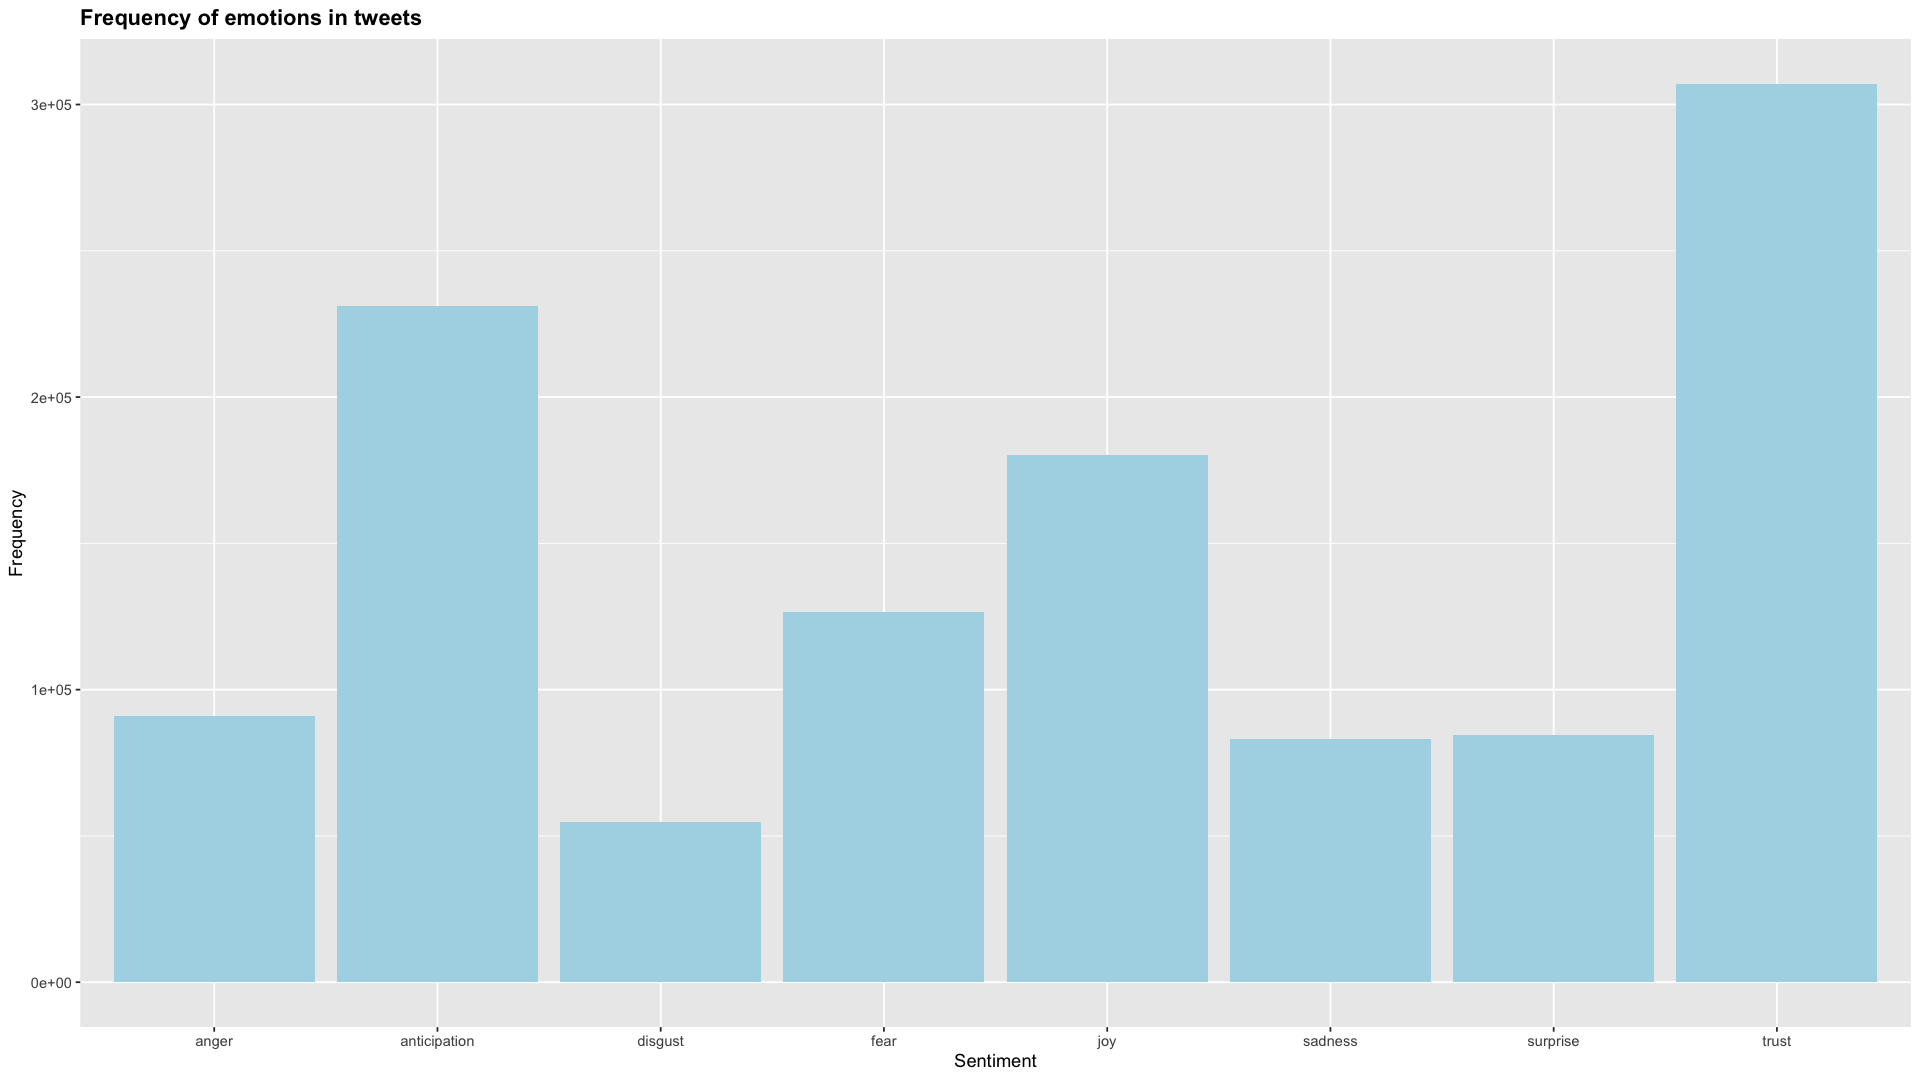

In [66]:
# representing as histogram
# we see that trust is a really important issue regarding ChatGPT
# it also generates a lot of anticipation
# and that both joy and fear are present in the tweets
tweets_emotions_count <- tweets_words_nrc %>%
    group_by(sentiment) %>%
    count(sentiment)
ggplot(tweets_emotions_count, aes(x=sentiment, y=n)) + 
    geom_col(fill="lightblue") + 
    labs(title="Frequency of emotions in tweets", x="Sentiment", y="Frequency") + 
    theme(plot.title = element_text(face="bold"))

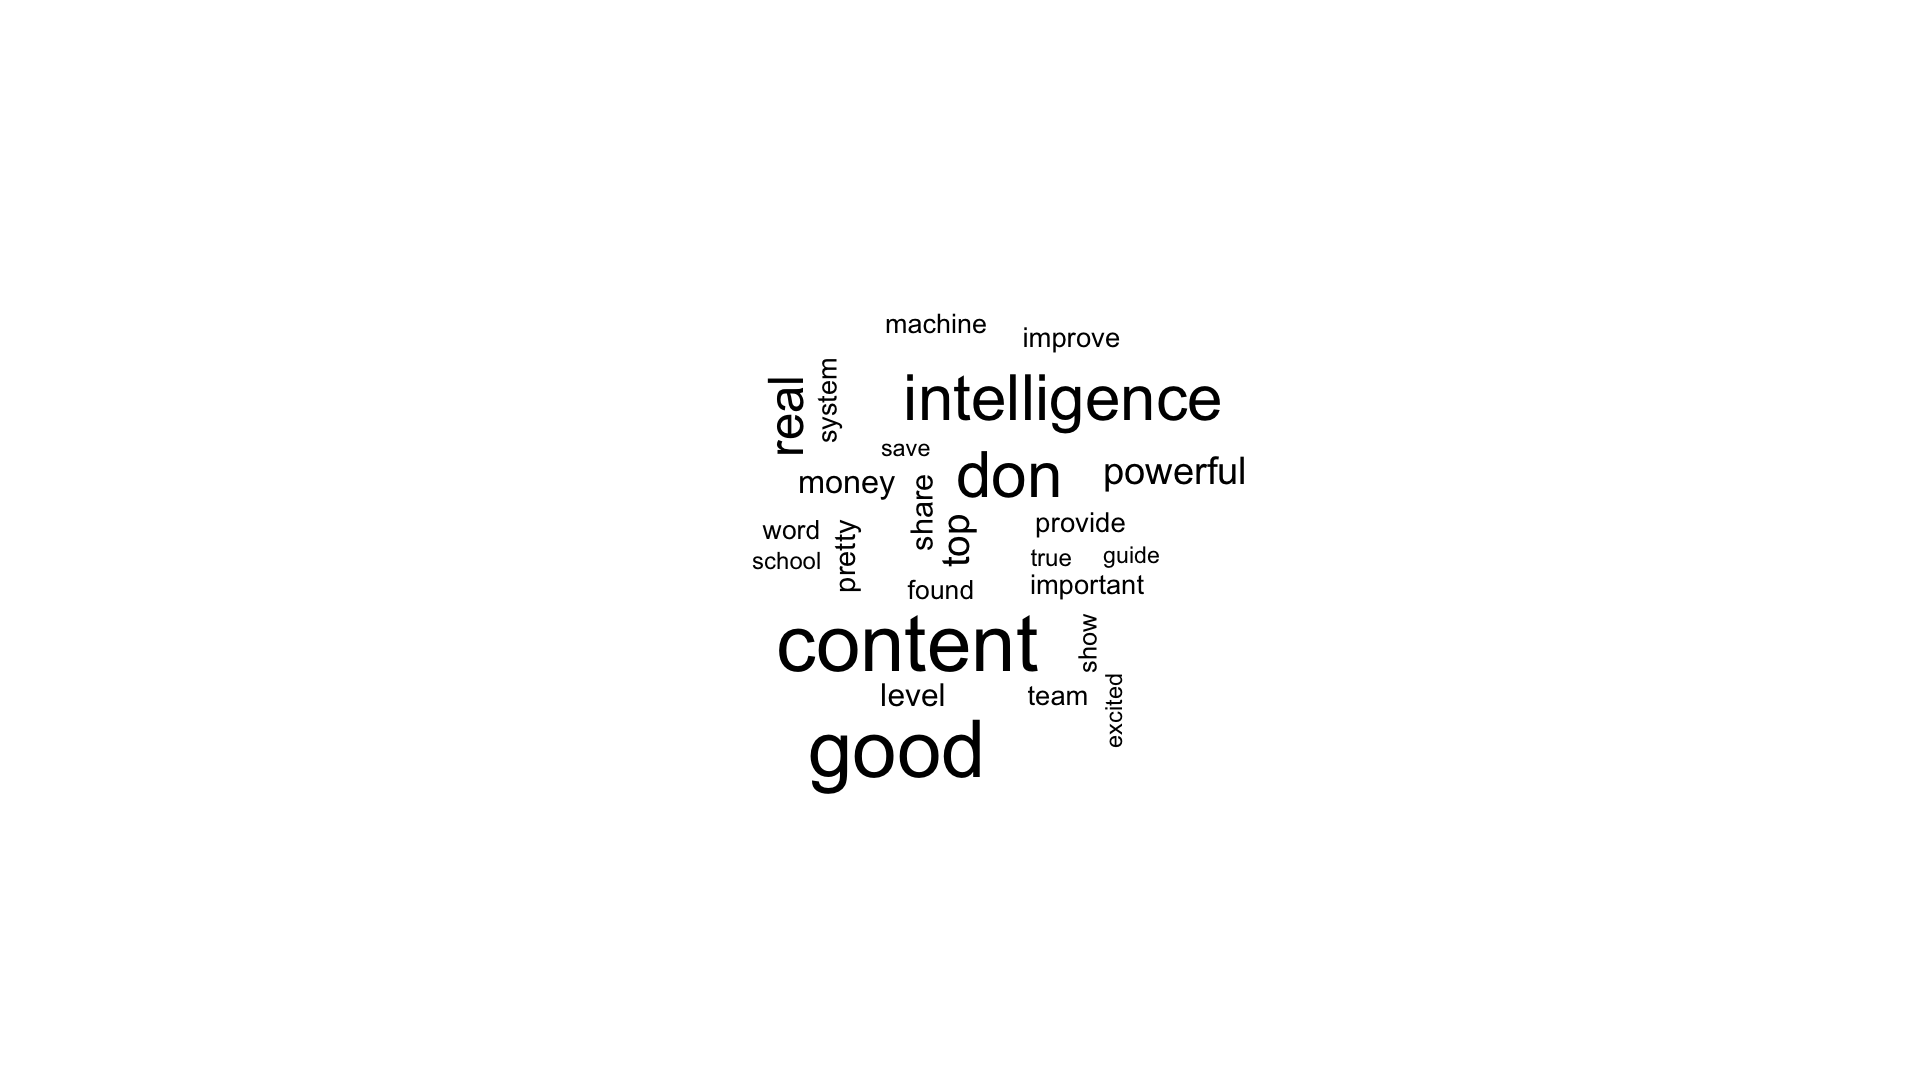

In [67]:
# what words are associated with trust ?
tweets_words_nrc %>% 
    filter(sentiment == "trust") %>%
    group_by(word) %>%
    count(word) %>%
    with(wordcloud(word, n, max.words=25))

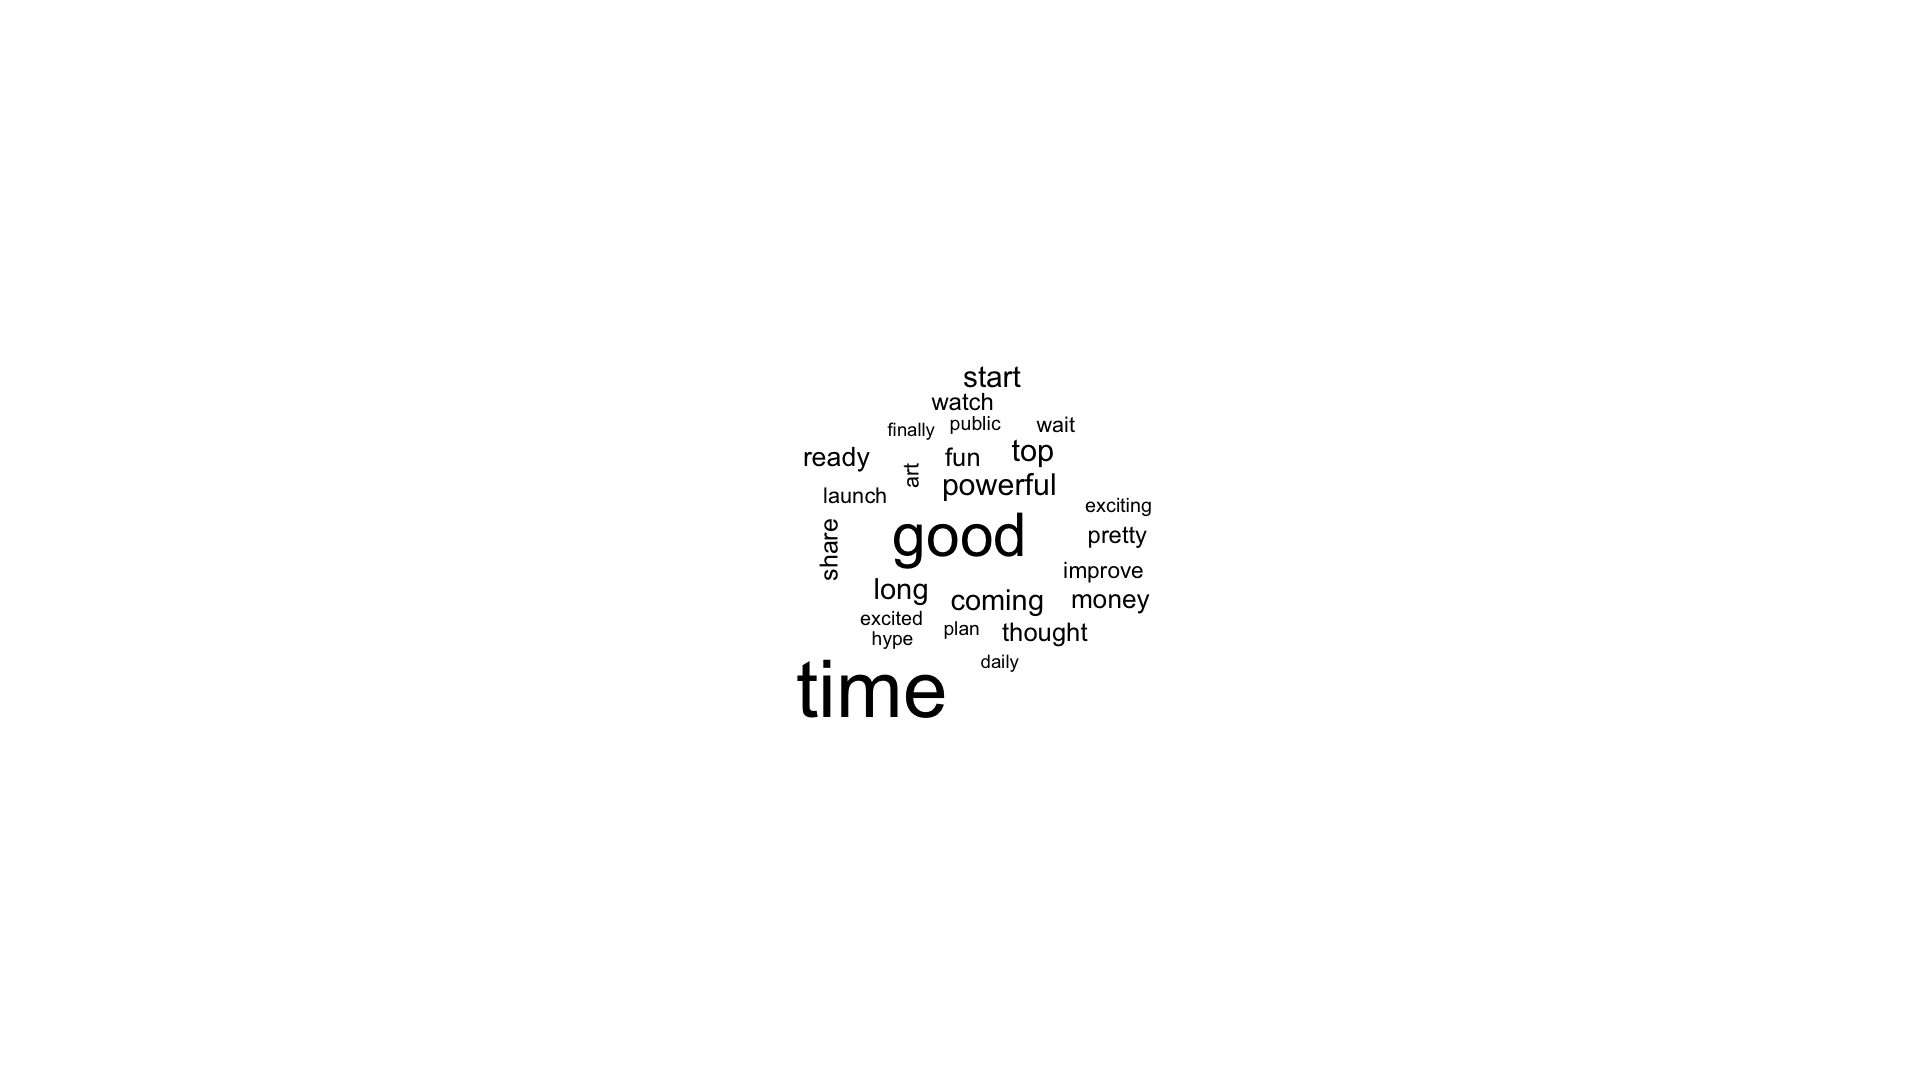

In [69]:
# what words are associated with anticipation ?
tweets_words_nrc %>%
    filter(sentiment == "anticipation") %>%
    group_by(word) %>%
    count(word) %>%
    with(wordcloud(word, n, max.words=25))

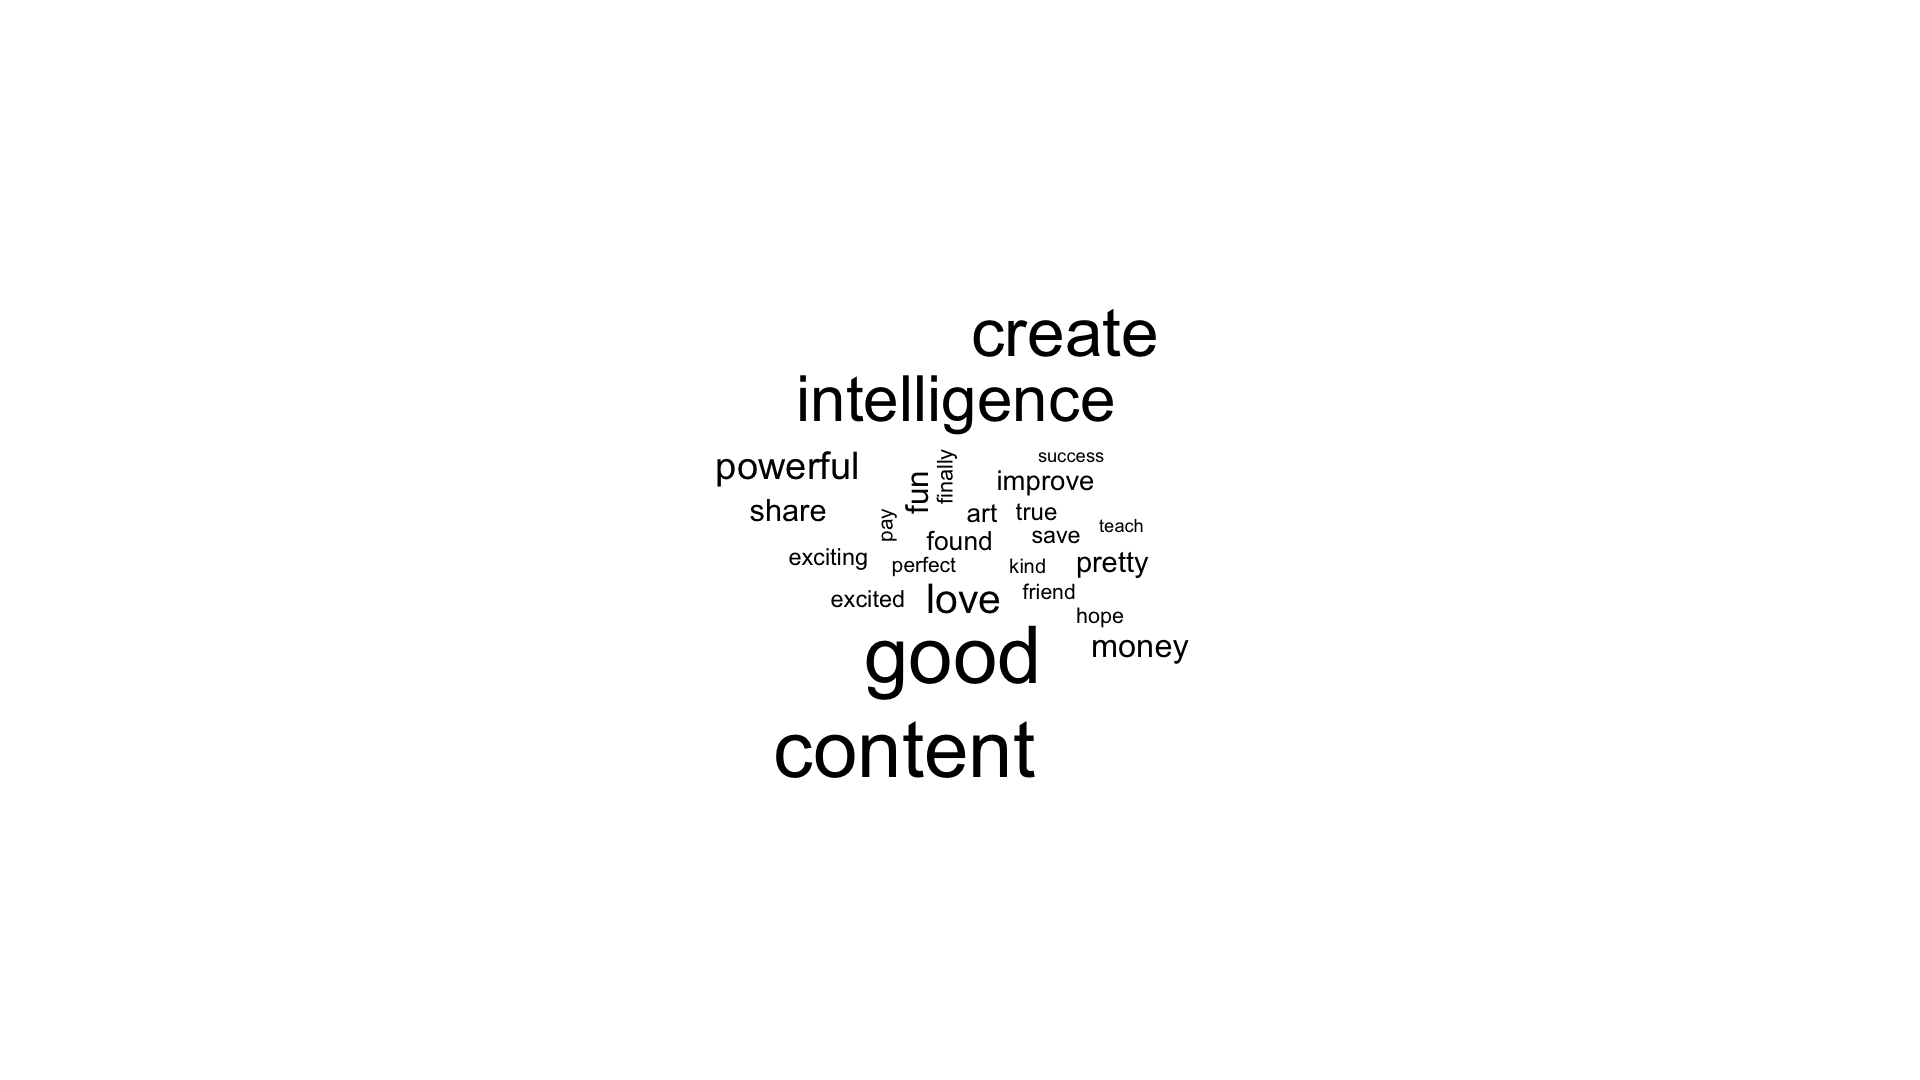

In [70]:
# what words are associated with joy ?
tweets_words_nrc %>% 
    filter(sentiment == "joy") %>%
    group_by(word) %>%
    count(word) %>%
    with(wordcloud(word, n, max.words=25))

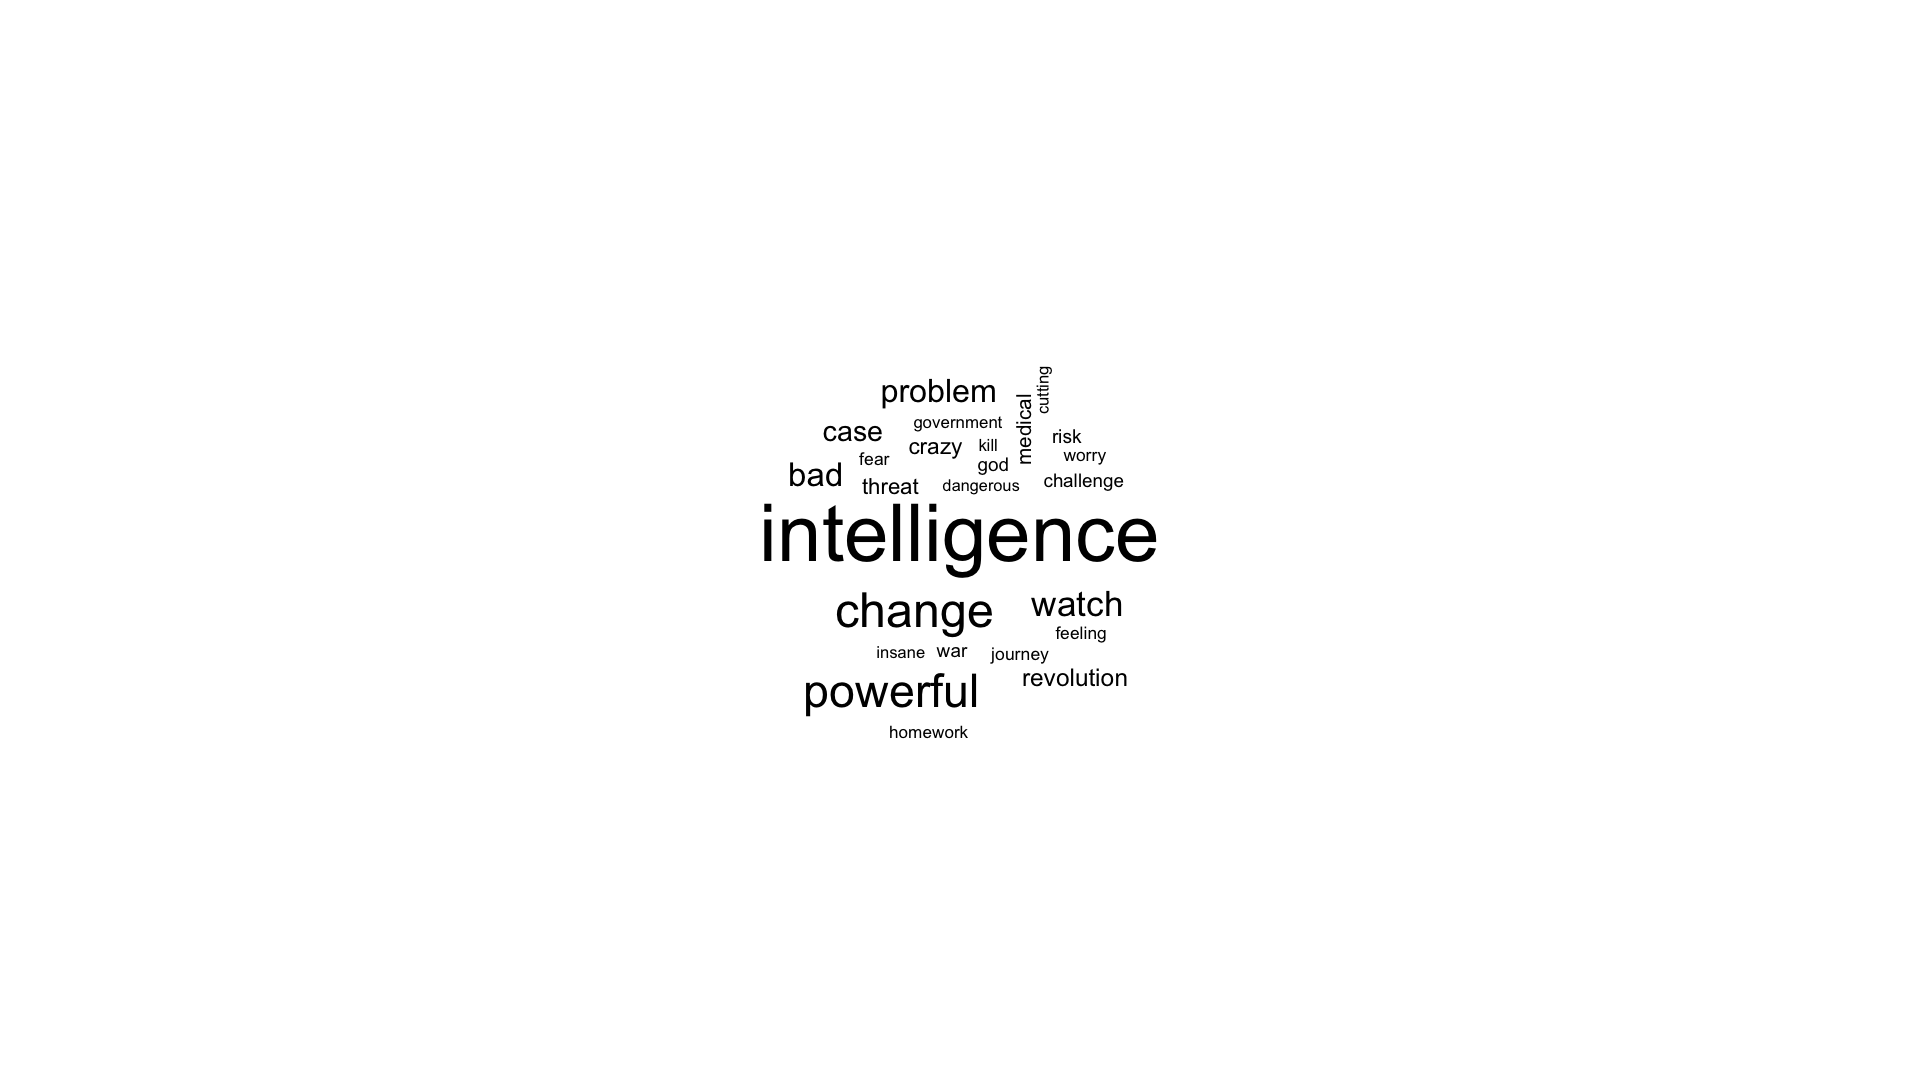

In [71]:
# what words are associated with fear ?
tweets_words_nrc %>% 
    filter(sentiment == "fear") %>%
    group_by(word) %>% 
    count(word) %>%
    with(wordcloud(word, n, max.words=25))

# Temporal analyses

In [72]:
# in the previous analyses, we gathered all tweets as a whole
# let's examine if the sentiment has evolved through time
# we'll have to take the original dataframe, attribute a week number to each tweet
# then make the analyses based on this week identifier

In [73]:
# let's create a week identifier, using week number, and add it to the original dataframe
tweets_df$week <- strftime(as.Date(tweets_df$date), format="%V")

# and put back the cleaned content in the dataframe
tweets_df$clean_content <- tweets

In [74]:
# we now have this dataframe
tweets_df[1:10,]

,date,id,content,username,like_count,retweet_count,week,clean_content
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,2023-03-29 22:58:21+00:00,1641213230730051584,"Free AI marketing and automation tools, strategies, and collaboration launching new week https://t.co/Qwti8LfBpb #ChatGPT",RealProfitPros,0,0,13,free ai marketing and automation tools strategies and collaboration launching new week
2,2023-03-29 22:58:18+00:00,1641213218520481805,@MecoleHardman4 Chat GPT says it<80><99>s 15. <9f><98><82>,AmyLouWho321,0,0,13,chat gpt says its
3,2023-03-29 22:57:53+00:00,1641213115684536323,"https://t.co/FjJSprt0te - Chat with any PDF! Check out how this new AI quickly answers questions from your PDFs. Perfect for students, researchers, and other curious minds. #research #chatpdf #ChatGPT",yjleon1976,0,0,13,
4,2023-03-29 22:57:52+00:00,1641213110915571715,"AI muses: ""In the court of life, we must all face the judge of destiny and the jury of our actions. <9a><96><8f><9f><94> #OutOfContextAI #AILifeLessons #ChatGPT",ChatGPT_Thinks,0,0,13,ai muses in the court of life we must all face the judge of destiny and the jury of our actions
5,2023-03-29 22:57:26+00:00,1641213003260633088,"Most people haven't heard of Chat GPT yet. First, elite factions will decide which way to go on AI safety. Next they will push their agenda(s) on the public with misleading and oversimplified media presentations. Finally, the brainless Red and Blue camps will screech their lines",nikocosmonaut,0,0,13,most people haven t heard of chat gpt yet first elite factions will decide which way to go on ai safety next they will push their agenda s on the public with misleading and oversimplified media presentations finally the brainless red and blue camps will screech their lines
6,2023-03-29 22:57:20+00:00,1641212975012016128,@nytimes No! Chat Gpt has been putting together amazing recipes <9f><98><9f><98><9f><98>,cordydbarb,0,0,13,no chat gpt has been putting together amazing recipes
7,2023-03-29 22:57:06+00:00,1641212917868646400,@ylzkrtt Yes also by chat gpt you can make generative art more easy but needs code KNOWLEDGE. I did post resently some article about this matter. Take a look.,gomezfidelphani,1,0,13,yes also by chat gpt you can make generative art more easy but needs code knowledge i did post resently some article about this matter take a look
8,2023-03-29 22:57:02+00:00,1641212902375063552,"@robinhanson @razibkhan Most people haven't heard of Chat GPT yet. First, elite factions will decide which way to go on AI safety. Next they will push their agenda(s) on the public with misleading and oversimplified media presentations. Finally, the brainless Red and Blue camps will screech their lines",nikocosmonaut,0,0,13,most people haven t heard of chat gpt yet first elite factions will decide which way to go on ai safety next they will push their agenda s on the public with misleading and oversimplified media presentations finally the brainless red and blue camps will screech their lines
9,2023-03-29 22:56:52+00:00,1641212856984109072,Yours Robotically - by Shaun Usher - Letters of Note | I think #ChatGPT has been reading too many steamy romance novels <9f><98><82> https://t.co/r8WTOs1hYZ,lawyermarketer,0,0,13,yours robotically by shaun usher letters of note i think has been reading too many steamy romance novels


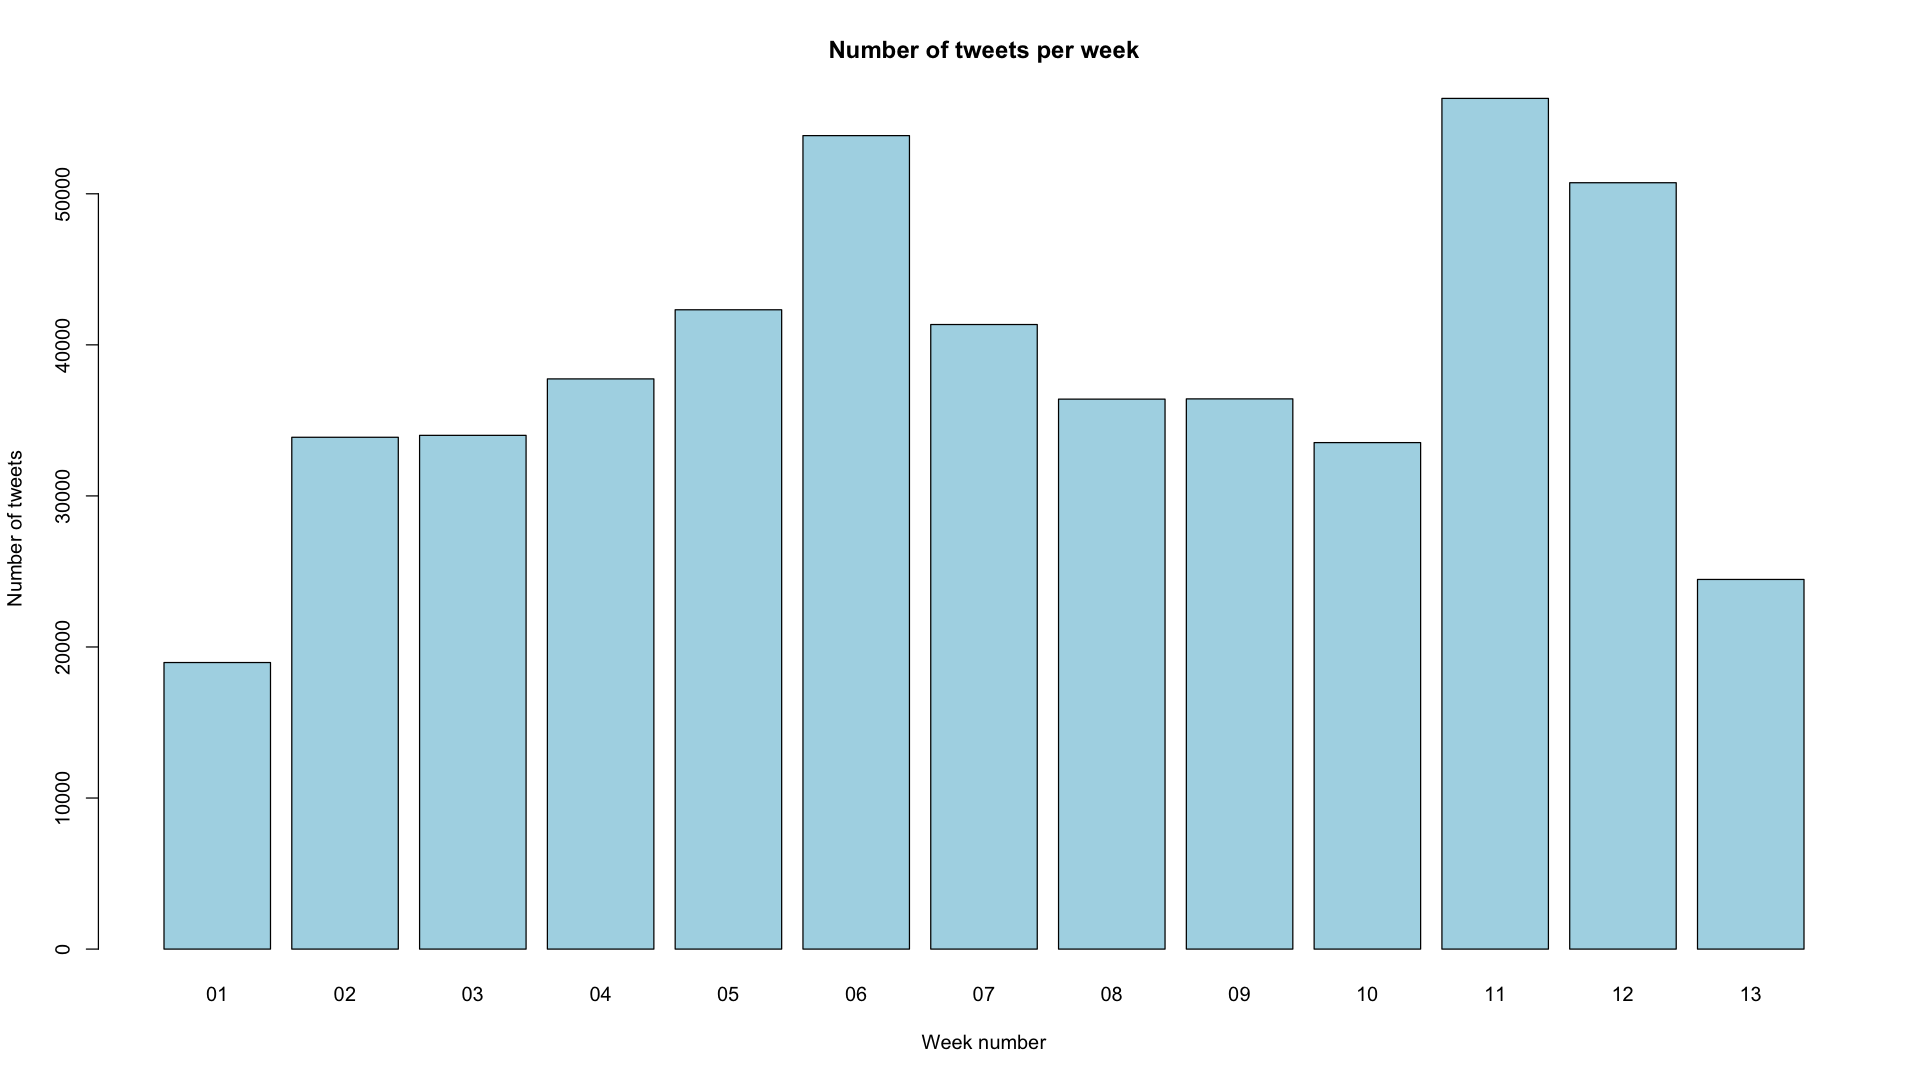

In [80]:
# checking how many tweets per week
tweets_perweek <- table(tweets_df$week)
week_numbers <- names(tweets_perweek)
barplot(tweets_perweek, main = "Number of tweets per week", xlab="Week number", ylab="Number of tweets", col="lightblue")

In [81]:
# checking polarity results for week #01
polarity(tweets_df[tweets_df$week == "01",]$clean_content)

all,wc,polarity,pos.words,neg.words,text.var
<chr>,<int>,<dbl>,<list>,<list>,<chr>
all,0,NaN,-,-,NA
all,0,NaN,-,-,NA
all,0,NaN,-,-,NA
all,0,NaN,-,-,NA
all,0,NaN,-,-,NA
all,0,NaN,-,-,NA
all,0,NaN,-,-,NA
all,0,NaN,-,-,NA
all,0,NaN,-,-,NA


In [82]:
# computing polarities across the 13 weeks
polarity_group <- data.frame()

for(x in week_numbers){
    # here we take the $group variable, which contains the averaged polarities
    y = polarity(tweets_df[tweets_df$week == x,]$clean_content)$group
    y$week <- x
    if(x == "01")
        polarity_group <- y
    else polarity_group <- rbind(polarity_group, y)
}
polarity_group <- select(polarity_group, -c("all"))

In [83]:
# checking results
polarity_group

total.sentences,total.words,ave.polarity,sd.polarity,stan.mean.polarity,week
<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
19004,384537,0.09930730,0.3011708,0.3297375,01
33916,678274,0.09518272,0.2966030,0.3209095,02
34043,677419,0.09267103,0.3003521,0.3085413,03
37780,741621,0.09275216,0.2932853,0.3162524,04
42356,816676,0.08536160,0.2992280,0.2852728,05
53885,1035084,0.07824385,0.3000315,0.2607854,06
41380,801755,0.08805319,0.3085823,0.2853475,07
36441,705861,0.09193129,0.3073900,0.2990705,08
36457,704346,0.10262666,0.2968963,0.3456650,09


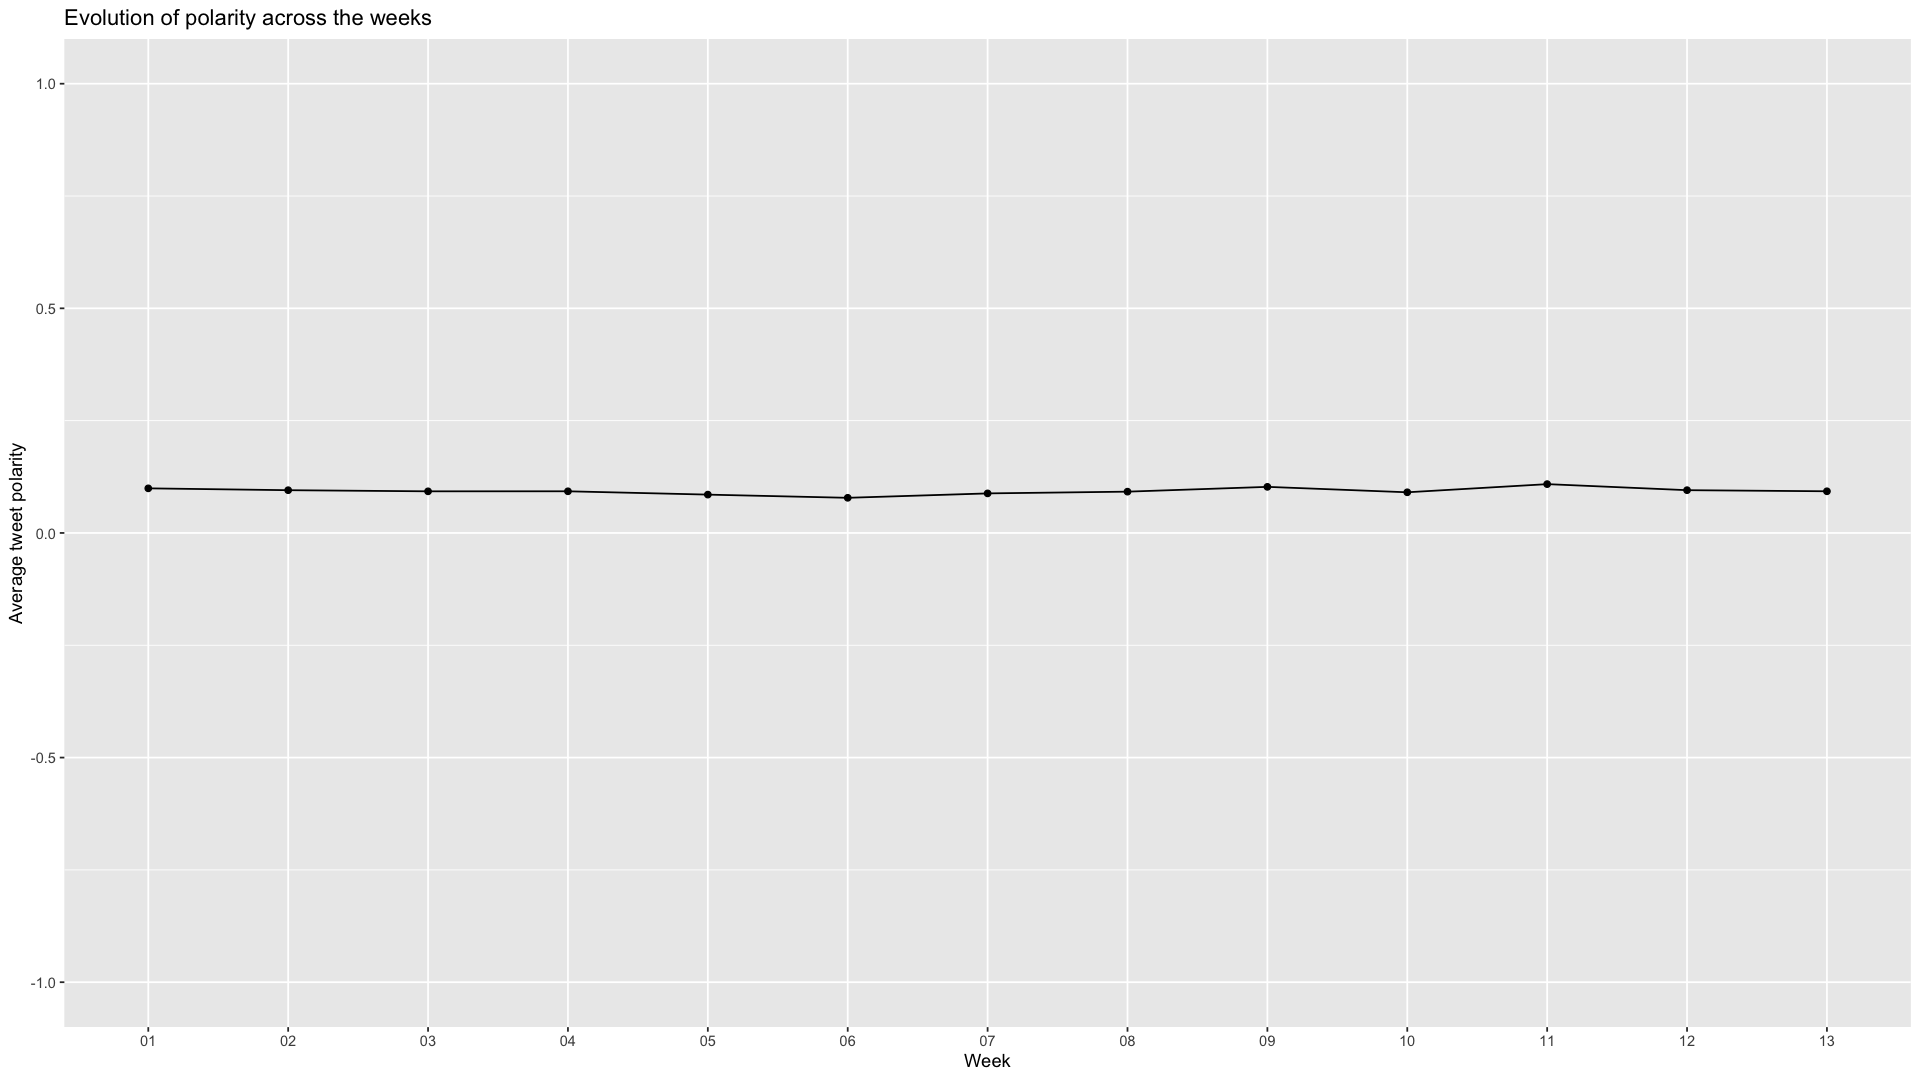

In [84]:
# plotting the evolution of polarity across the weeks
# we see that polarity is slightly above 0 and didn't change much across the 13 weeks
ggplot(polarity_group, aes(x=week, y=ave.polarity, group=1)) + geom_point() + geom_line() + ylim(-1,1) + labs(title="Evolution of polarity across the weeks", x="Week", y="Average tweet polarity")

In [85]:
# computing sentiment across the 13 weeks
polarity_group <- data.frame()

for(x in week_numbers){
    # here we take the $group variable, which contains the averaged polarities
    polarity_df = polarity(tweets_df[tweets_df$week == x,]$clean_content)$all
    # let's create a sentiment label variable, according if polarity is above, equal to, or less than 0
    polarity_df$sentiment <- ifelse(polarity_df$polarity == 0, "Neutral" , ifelse(polarity_df$polarity > 0, "Positive", "Negative" ))
    y <- as.data.frame(t(table(polarity_df$sentiment)))
    y$Var1 <- x
    if(x == "01")
        polarity_sentiments <- y
    else polarity_sentiments <- rbind(polarity_sentiments, y)
}
colnames(polarity_sentiments) <- c("Week","Sentiment","Freq")
polarity_sentiments

Week,Sentiment,Freq
<chr>,<fct>,<int>
01,Negative,3065
01,Neutral,8121
01,Positive,7691
02,Negative,5543
02,Neutral,14761
02,Positive,13460
03,Negative,5773
03,Neutral,14503
03,Positive,13606


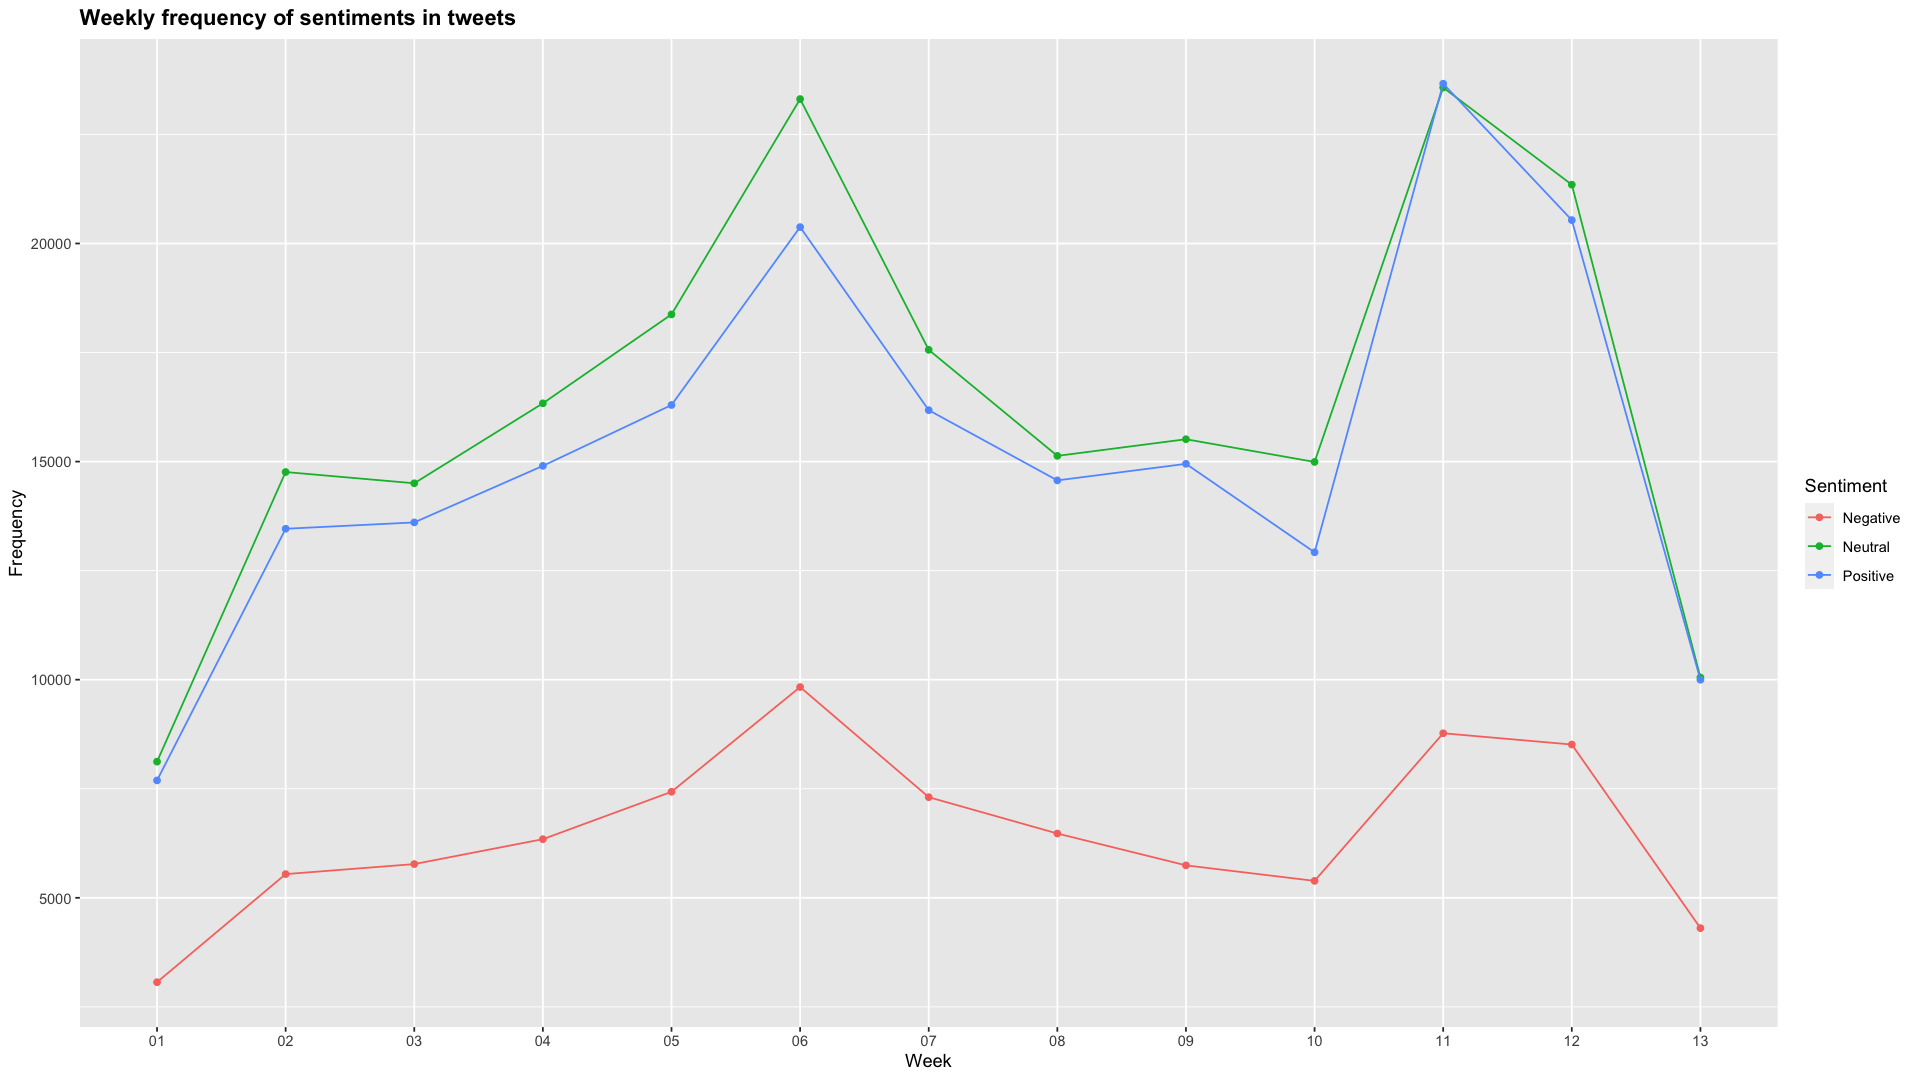

In [87]:
# bar plot of frequency sentiments per week
ggplot(polarity_sentiments, aes(x=Week,y=Freq, colour=Sentiment, group=Sentiment)) + geom_point() + geom_line() + labs(title="Weekly frequency of sentiments in tweets", x="Week", y="Frequency") + theme(plot.title = element_text(face="bold"))

## Evolution of sentiments across time

In [88]:
# analysing sentiments on tweets, per week
for (x in week_numbers[1:3]){
    print(x)
    # extracting words for the tweets that week
    tweets_words_week <- polarity(tweets_df[tweets_df$week == x,]$clean_content)$all %>% unnest_tokens(word, text.var) %>% select(word)
    # getting the emotion word using the nrc lexicon, then removing the "positive" and "negative" labels
    tweets_words_nrc <- tweets_words_week %>% inner_join(nrc, by=c("word"="word"), relationship = "many-to-many") %>% filter(!sentiment %in% c("positive", "negative"))
    # counting emotions for that week
    tweets_emotions_count <- tweets_words_nrc %>% group_by(sentiment) %>% count(sentiment)

    print(tweets_emotions_count)
    ggplot(tweets_emotions_count, aes(x=sentiment, y=n)) + geom_col(fill="lightblue") + labs(title=paste("Frequency of emotions in tweets - week ", x, sep=""), x="Sentiment", y="Frequency") + theme(plot.title = element_text(face="bold"))
}

[1] "01"
# A tibble: 8 x 2
# Groups:   sentiment [8]
  sentiment        n
  <chr>        <int>
1 anger         3325
2 anticipation  8694
3 disgust       1988
4 fear          4673
5 joy           7137
6 sadness       3034
7 surprise      3235
8 trust        12059
[1] "02"
# A tibble: 8 x 2
# Groups:   sentiment [8]
  sentiment        n
  <chr>        <int>
1 anger         6202
2 anticipation 15891
3 disgust       3721
4 fear          8452
5 joy          12907
6 sadness       5884
7 surprise      6058
8 trust        21251
[1] "03"
# A tibble: 8 x 2
# Groups:   sentiment [8]
  sentiment        n
  <chr>        <int>
1 anger         6107
2 anticipation 15858
3 disgust       3559
4 fear          8358
5 joy          12787
6 sadness       5882
7 surprise      5958
8 trust        21668


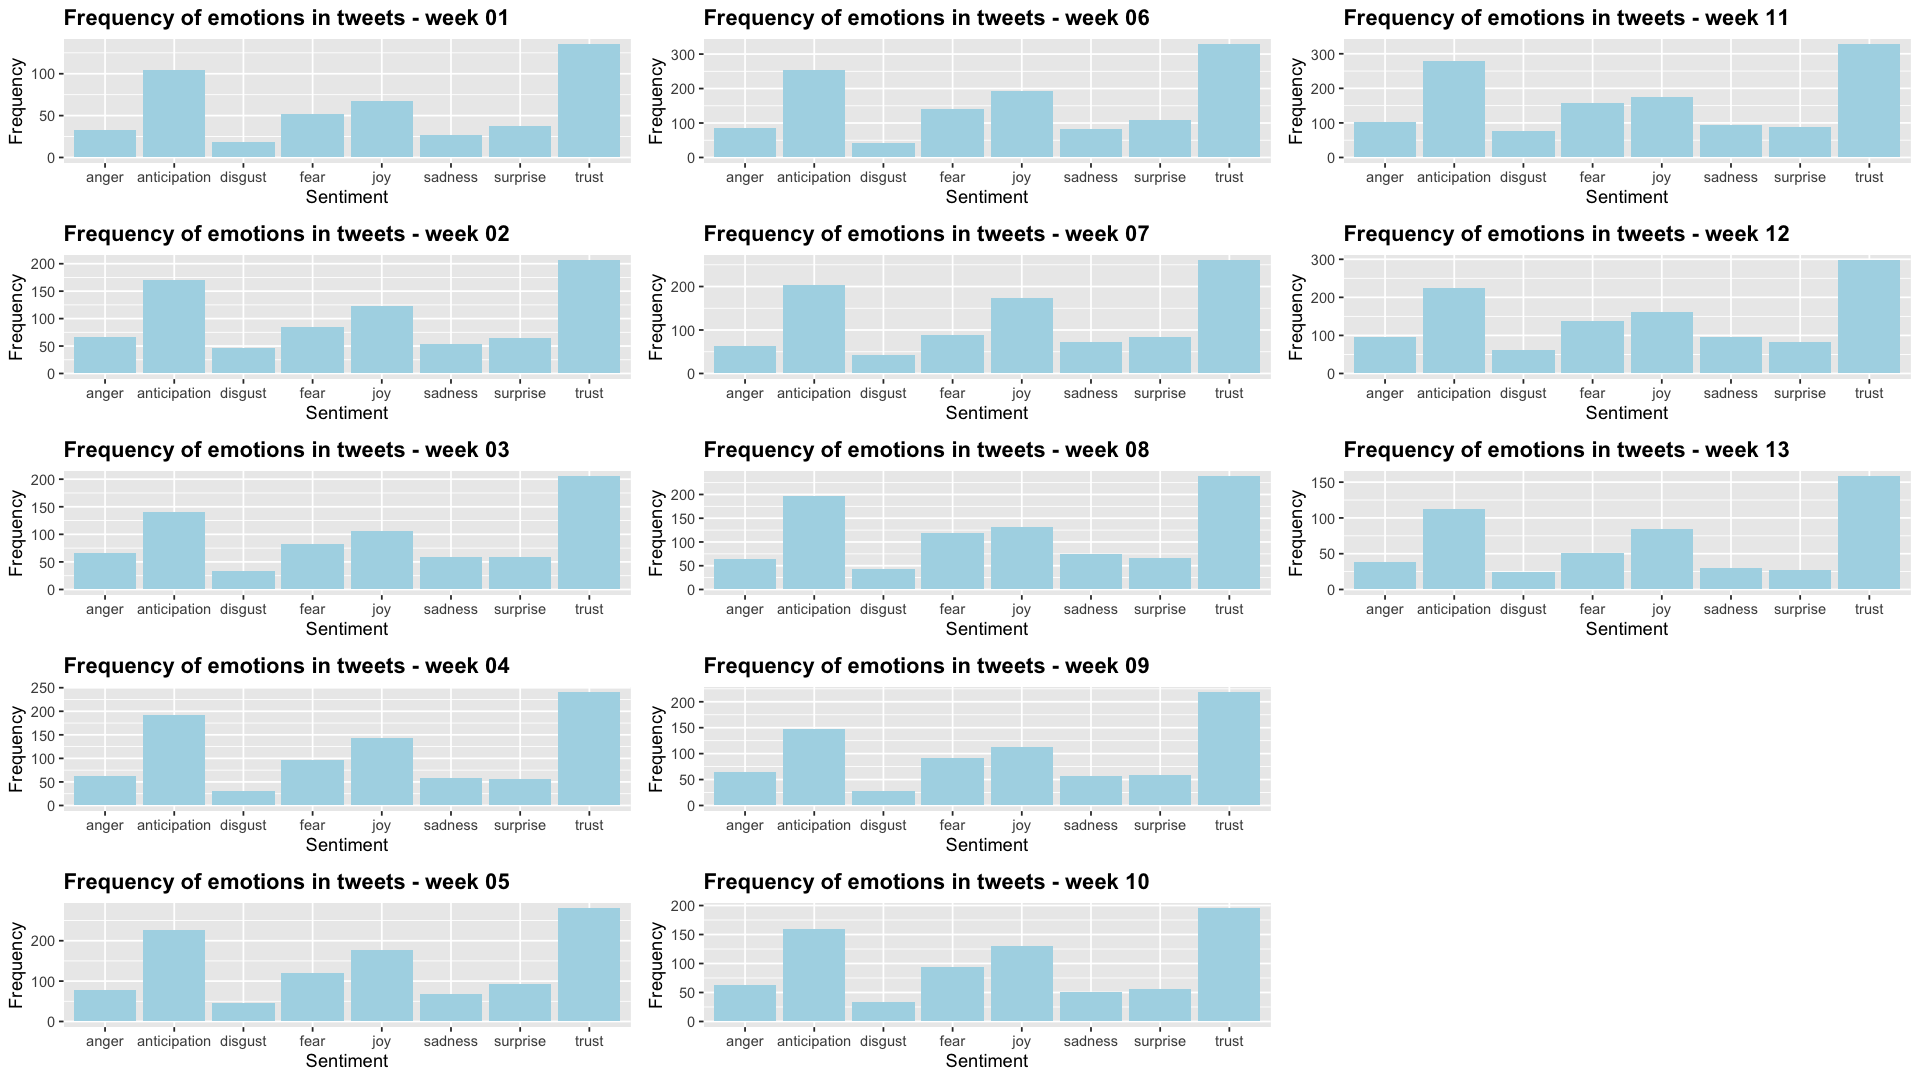

In [102]:
# analysing sentiments on tweets, per week
weeklyPlots <- list()
for (x in week_numbers){
    # print(x)
    # extracting words for the tweets that week
    tweets_words_week <- polarity(tweets_df[tweets_df$week == x,]$clean_content)$all %>% unnest_tokens(word, text.var) %>% select(word)
    # getting the emotion word using the nrc lexicon, then removing the "positive" and "negative" labels
    tweets_words_nrc <- tweets_words_week %>% inner_join(nrc, by=c("word"="word"), relationship = "many-to-many") %>% filter(!sentiment %in% c("positive", "negative"))
    # counting emotions for that week
    tweets_emotions_count <- tweets_words_nrc %>% group_by(sentiment) %>% count(sentiment)

    # print(tweets_emotions_count)
    p1 <- ggplot(tweets_emotions_count, aes(x=sentiment, y=n)) + geom_col(fill="lightblue") + labs(title=paste("Frequency of emotions in tweets - week ", x, sep=""), x="Sentiment", y="Frequency") + theme(plot.title = element_text(face="bold"))
    weeklyPlots[[x]] <- p1
}
multiplot(plotlist = weeklyPlots, cols =3)

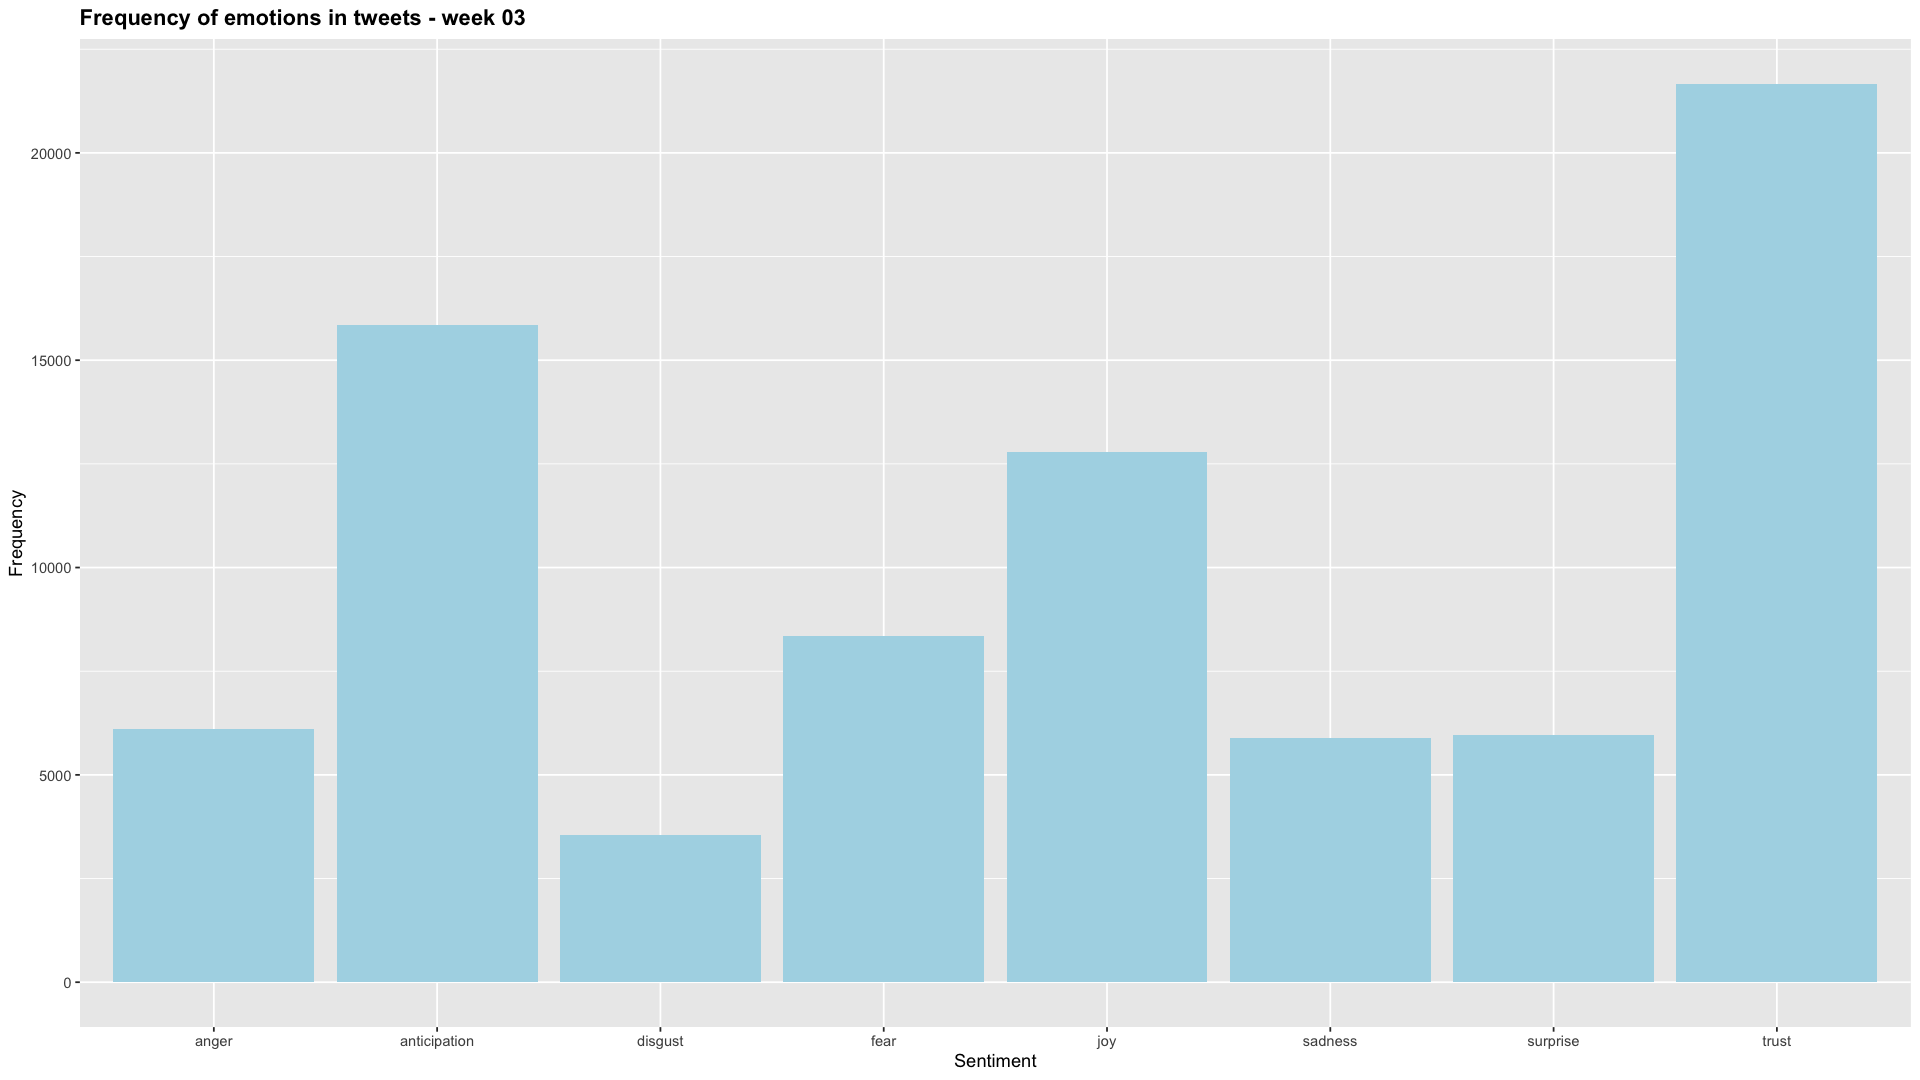

In [89]:
# plotting just one week - week 13
ggplot(tweets_emotions_count, aes(x=sentiment, y=n)) + geom_col(fill="lightblue") + labs(title=paste("Frequency of emotions in tweets - week ", x, sep=""), x="Sentiment", y="Frequency") + theme(plot.title = element_text(face="bold"))

In [91]:
# analysing sentiments on tweets, per week
# computing the frequencies, so to plot the evolution of each emotion, per week
emotions_week_df <- data.frame()
for (x in week_numbers){
    # print(x)
    tweets_words_week <- polarity(tweets_df[tweets_df$week == x,]$clean_content)$all %>% unnest_tokens(word, text.var) %>% select(word)
    # let's remove the "positive" and "negative" labels
    tweets_words_nrc <- tweets_words_week %>% inner_join(nrc, by=c("word"="word"), relationship = "many-to-many") %>% filter(!sentiment %in% c("positive", "negative"))
    # tweets_words_nrc %>% filter(row_number() <=20)
    # representing as histogram
    tweets_emotions_count <- tweets_words_nrc %>% group_by(sentiment) %>% count(sentiment)
    if(x == "01") 
        emotions_week_df <- tweets_emotions_count$n
    else 
        emotions_week_df <- rbind(emotions_week_df, tweets_emotions_count$n)
    
}
colnames(emotions_week_df) <- tweets_emotions_count$sentiment
rownames(emotions_week_df) <- week_numbers
emotions_week_df <- as.data.frame(emotions_week_df)

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."


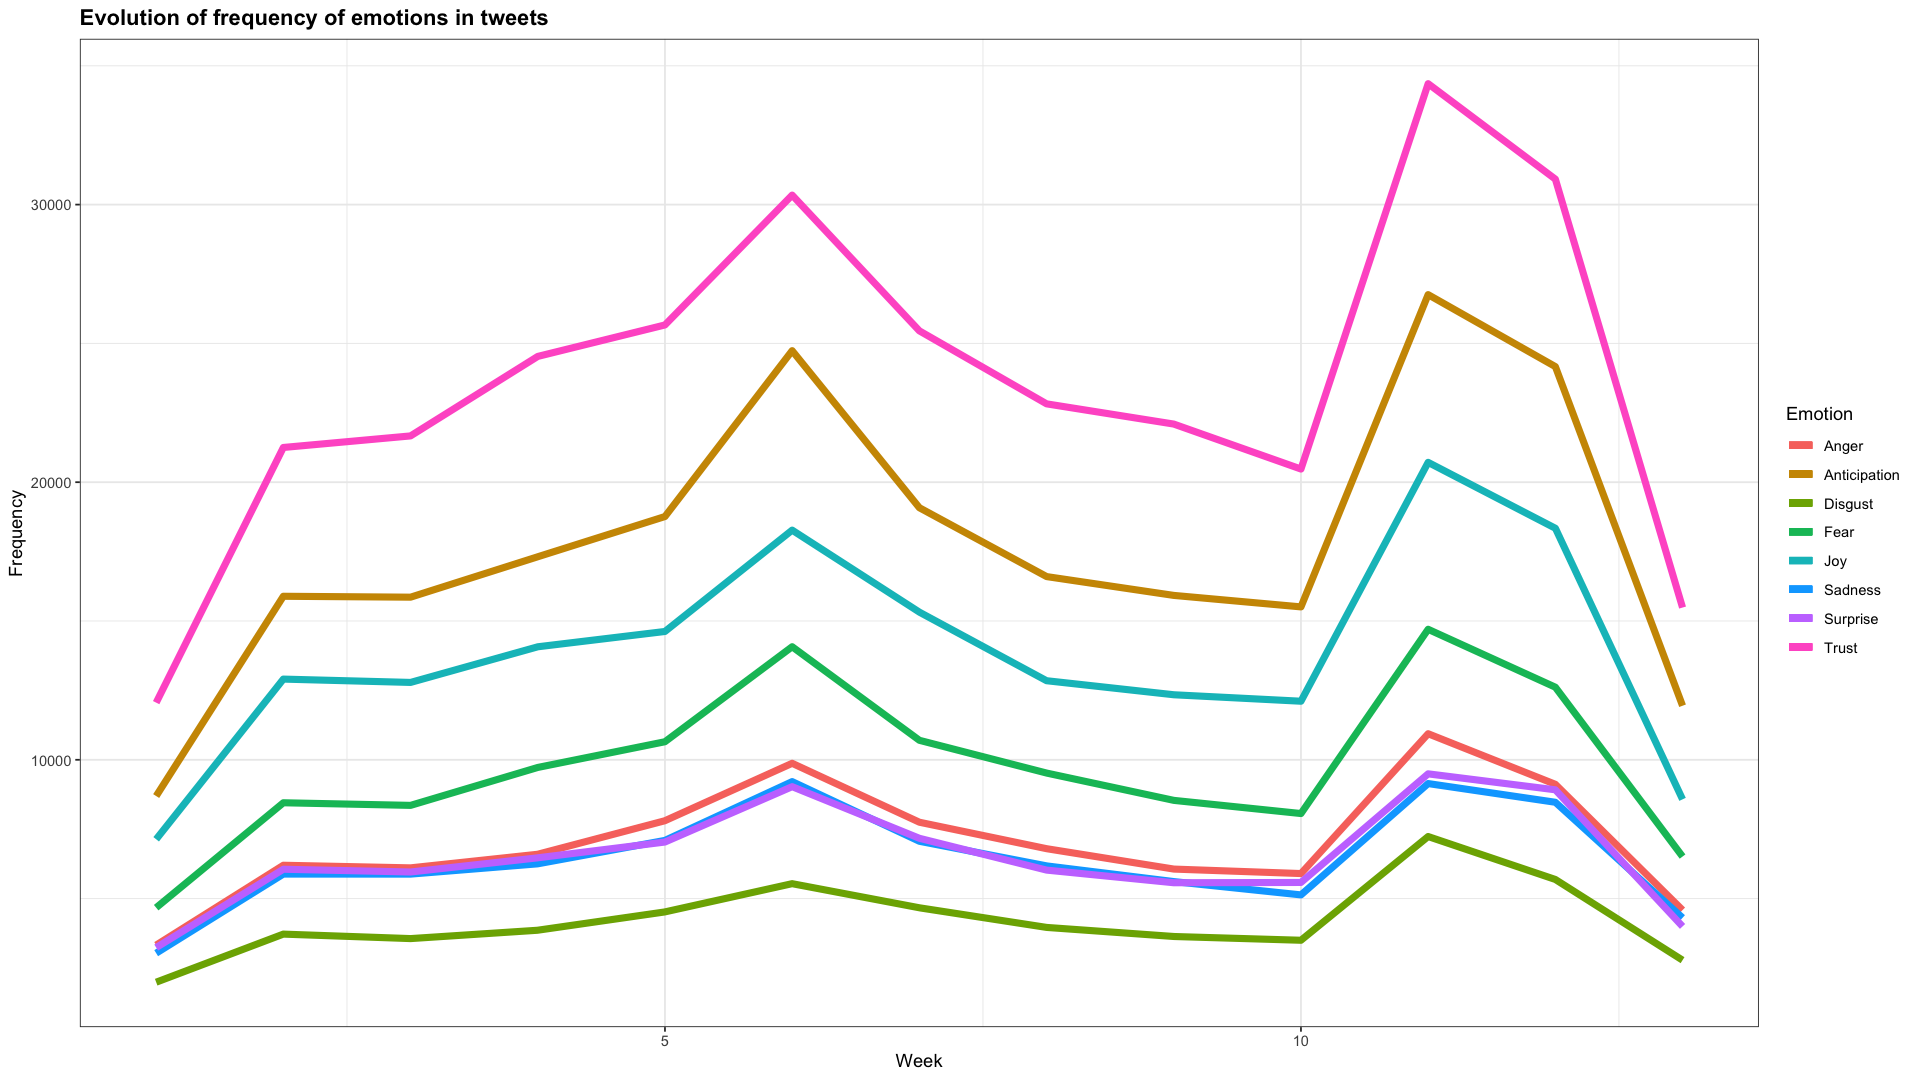

In [92]:
# graphing the evolution of each emotion per week
ggplot(emotions_week_df, aes(x=1:nrow(emotions_week_df))) + 
geom_line(aes( y=anger, colour="Anger"), size=2) + 
geom_line(aes( y=anticipation, colour="Anticipation"), size=2) + 
geom_line(aes( y=disgust, colour="Disgust"), size=2) + 
geom_line(aes( y=fear, colour="Fear"), size=2) + 
geom_line(aes( y=joy, colour="Joy"), size=2) + 
geom_line(aes( y=sadness, colour="Sadness"), size=2) + 
geom_line(aes( y=surprise, colour="Surprise"), size=2) + 
geom_line(aes( y=trust, colour="Trust"), size=2) + 
labs(title="Evolution of frequency of emotions in tweets", x="Week", y="Frequency", colour="Emotion") +
theme_bw() + theme(plot.title = element_text(face="bold"))

In [93]:
# calculating the proportion of each emotion relative to the total of emotions per week
# will scale for the number of emotions per week
emotions_prop_perweek <- as.data.frame(t(apply(emotions_week_df,1,function(x) x/sum(x))))
emotions_prop_perweek

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
01,0.07531997,0.1969419,0.04503341,0.1058557,0.1616718,0.06872806,0.07328123,0.2731680
02,0.07717194,0.1977329,0.04630067,0.1051689,0.1606027,0.07321504,0.07538014,0.2644277
03,0.07616898,0.1977874,0.04438929,0.1042444,0.1594846,0.07336269,0.07431059,0.2702521
04,0.07428423,0.1949314,0.04346945,0.1094786,0.1584197,0.07040002,0.07283188,0.2761847
05,0.08117383,0.1951146,0.04701344,0.1107587,0.1520631,0.07380101,0.07318747,0.2668878
06,0.08154804,0.2042996,0.04573760,0.1162270,0.1509143,0.07609719,0.07459408,0.2505823
07,0.07974078,0.1962763,0.04802757,0.1100962,0.1575888,0.07267397,0.07378491,0.2618114
08,0.08020103,0.1958543,0.04674264,0.1123499,0.1515892,0.07289823,0.07110498,0.2692598
09,0.07600807,0.1995713,0.04556223,0.1070305,0.1547110,0.07035510,0.06982866,0.2769331


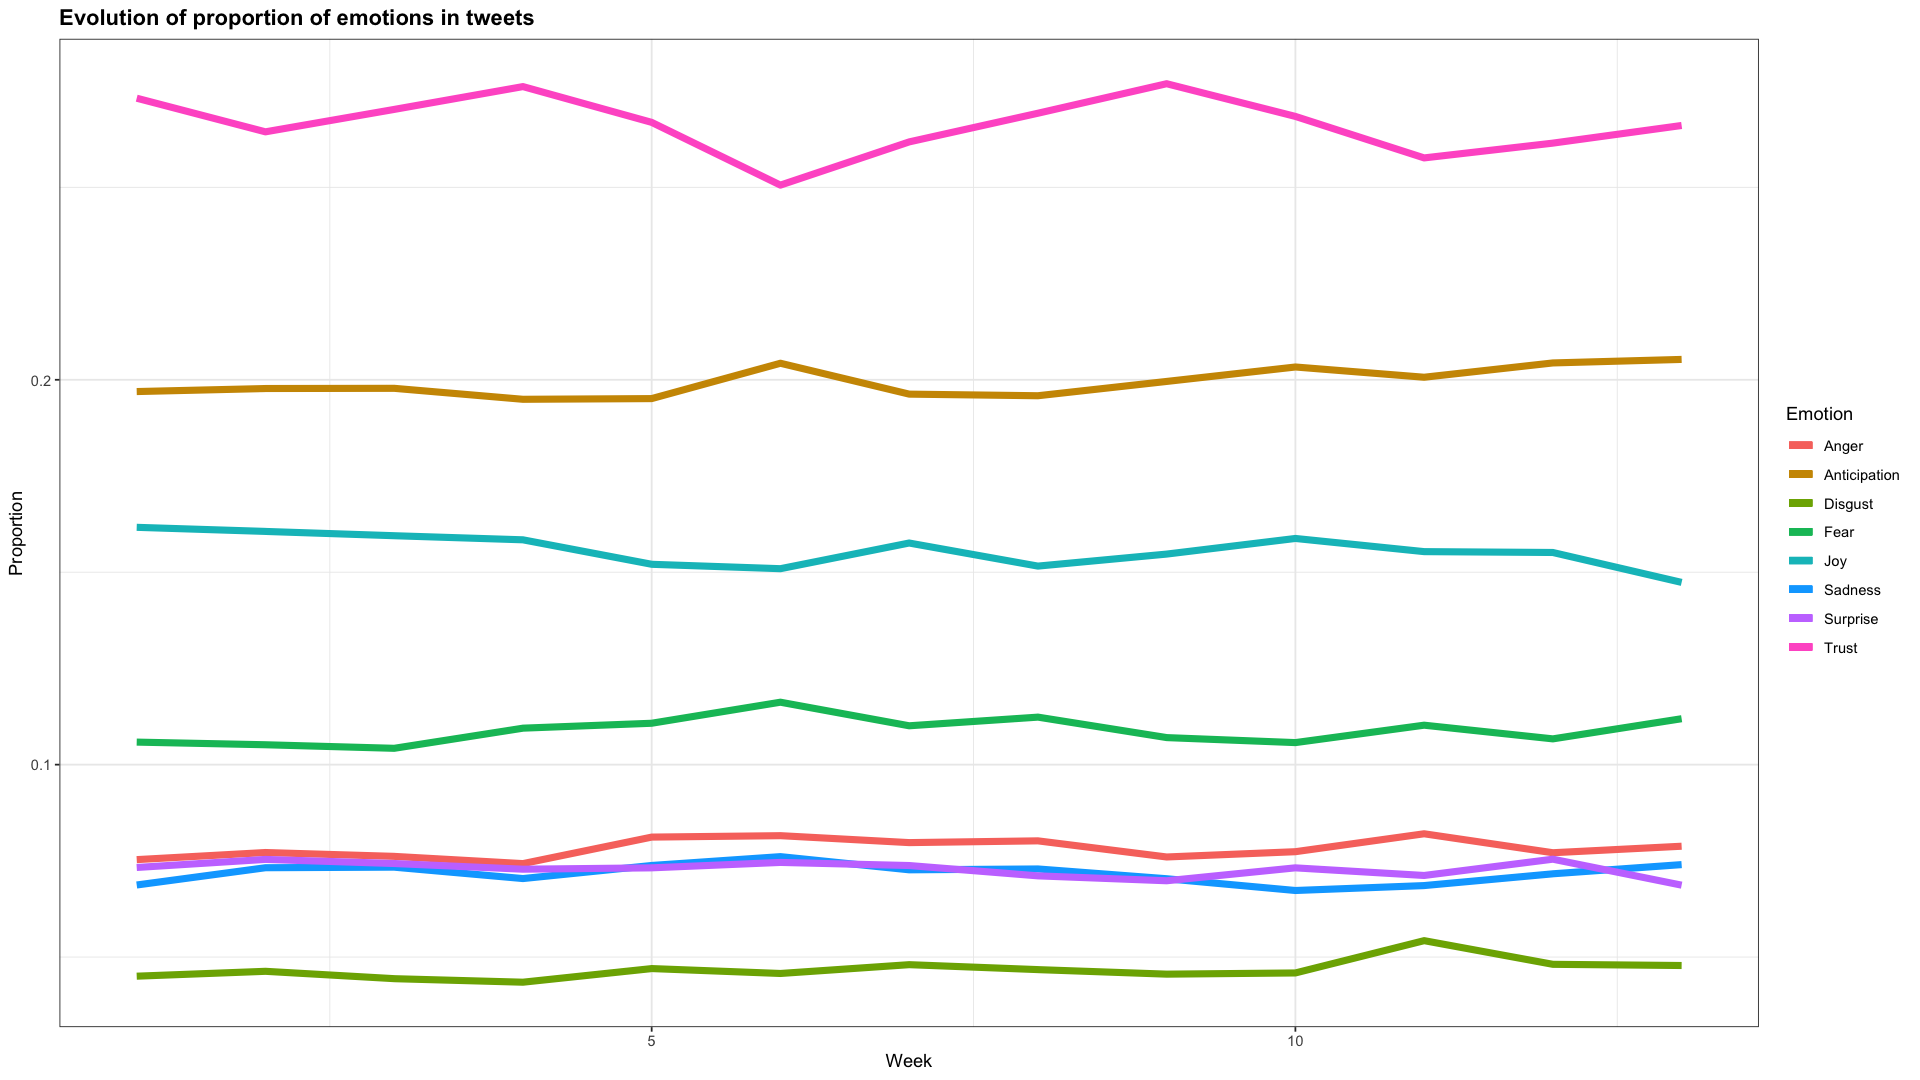

In [94]:
# graphing the evolution of each emotion per week
ggplot(emotions_prop_perweek
, aes(x=1:nrow(emotions_week_df))) + 
geom_line(aes( y=anger, colour="Anger"), size=2) + 
geom_line(aes( y=anticipation, colour="Anticipation"), size=2) + 
geom_line(aes( y=disgust, colour="Disgust"), size=2) + 
geom_line(aes( y=fear, colour="Fear"), size=2) + 
geom_line(aes( y=joy, colour="Joy"), size=2) + 
geom_line(aes( y=sadness, colour="Sadness"), size=2) + 
geom_line(aes( y=surprise, colour="Surprise"), size=2) + 
geom_line(aes( y=trust, colour="Trust"), size=2) + 
labs(title="Evolution of proportion of emotions in tweets", x="Week", y="Proportion", colour="Emotion") +
theme_bw() + theme(plot.title = element_text(face="bold"))

In [ ]:
# we see that the proportion of emotions is relatively stable across the 13 weeks
# Trust is the leading emotion throughout the period, followed by anticipation, joy and fear
# the other four emotions are trailing, with disgust the least frequent emotion overall
# that are a few bumps where some changes appeared, but they probably are not significant overall (of course, that would need to be tester)
